# Introduction

The purpose of this project is to gather insights from pre-pandemic mental health data. This data was collected between 2005 and March 2020  by the Centers for Disease Control and Prevention for the NHANES program. The insights gathered from this data will later be compared with post-pandemic NHANES data, when it is released. 

_____________________


The [National Health and Nutrition Examination Survey (NHANES)](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) is a ["program of studies designed to assess the health and nutritional status of adults and children in the United States."](https://www.cdc.gov/nchs/nhanes/about_nhanes.htm) 

Each person selected to participate in this program is interviewed and medically examined.

In the interviewing stage, each person responds to a wide variety of different questions, including but not limited to, questions about their demographics, sexual behavior, nutrition, income, and medications.

One component of the interviewing stage is the depression screener. Respondents\* are asked to answer questions from the Patient Health Questionnaire-9 (PHQ-9), [a test used to assess depression severity](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1495268/). 

The test asks "Over the last 2 weeks, how often have you been bothered by any of the following problems?"

```
1. Little interest or pleasure in doing things	
2. Feeling down, depressed, or hopeless
3. Trouble falling or staying asleep, or sleeping too much	
4. Feeling tired or having little energy	
5. Poor appetite or overeating
6. Feeling bad about yourself—or that you are a failure or have let yourself or your family down	
7. Trouble concentrating on things, such as reading the newspaper or watching television	
8. Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual	
9. Thoughts that you would be better off dead or of hurting yourself in some way	
```

For each problem, the respondent must provide a number between 0 and 3, where:

```
0 : Not at all
1 : Several days
2 : More than half the days
3 : Nearly every day
```

The final test score is determined by adding up the answers for each problem.

```
0  - 4  : Minimal Depression
5  - 9  : Mild Depression
10 - 14 : Moderate Depression
15 - 19 : Moderately Severe Depression
20 - 27 : Severe Depression
```

An additional question is asked if the respondent has a score greater than 0: "If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?"

The possible answers for this question are:

```
Not difficult at all	
Somewhat difficult	
Very difficult	
Extremely difficult
```

I am interested in comparing the pre-pandemic NHANES PHQ-9 results with the post-pandemic results. According to the World Health Organization (WHO), the pandemic [triggered a significant increase in depression worldwide](https://www.who.int/news/item/02-03-2022-covid-19-pandemic-triggers-25-increase-in-prevalence-of-anxiety-and-depression-worldwide). The American Psychological Association (APA) states that the stress caused by the pandemic led to a mental health crisis that ["could yield serious health and social consequences for years to come."](https://www.apa.org/news/press/releases/stress/2020/report-october) A [Gallup poll](https://news.gallup.com/poll/505745/depression-rates-reach-new-highs.aspx) obtained between February 21 to February 28, 2023 found that around 29.0% of American adults, had or was treated for depression, a sharp increase from the 2019 estimate of 21.6%. 

The NHANES PHQ-9 data for the August 2021-August 2023 cycle is not currently available (at the time this project was completed). While waiting for the data to be published, this project instead focuses on understanding PHQ-9 data *pre*-pandemic. When the data is published, we can compare the insights we've gathered here to the post-pandemic data.

Using the PHQ-9 data from the

* 2005-2006, 
* 2007-2008, 
* 2009-2010, 
* 2011-2012, 
* 2013-2014, 
* 2015-2016, and 
* 2017-March 2020\*\*

cycles of the NHANES program, I would like to answer the following questions:


**1. How similar are the distributions of test scores and results for each cycle?**

**2. Which of the 9 problems were the most rare and the most common?**

**3. For each problem, how likely was each answer? (i.e. How likely is 0, 1, 2, or 3 for each of the nine problems?)**

**4. Out of those who answered "Somewhat difficult", "Very difficult", or "Extremely difficult" to the final question, how many were seeking help from a mental health professional?**

_____________________

Notes:

\* While the depression screener was given to both American adults and minors, only the data for adults is publicly available. Therefore, the data I am using is from respondents who are 18 years or older.

\*\* Due to COVID-19, the NHANES program was suspended. Thus, data collection for the NHANES 2019-2020 cycle was not completed, and the data was not representative of the entire U.S. population. The collected data was combined with the data from the NHANES 2017-2018 cycle to form a sample representative of the U.S. population. More information can be found [here](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?Cycle=2017-2020).

# Importing Libraries

The first thing we will do is import `pandas`, which we will use to import and manipulate the data.

In [123]:
import pandas as pd

We will also import `matplotlib` for data visualization.

In [124]:
import matplotlib.pyplot as plt

# Importing the Data

Now, we will import the PHQ-9 data itself. 

The [NHANES website](https://wwwn.cdc.gov/nchs/nhanes/default.aspx) contains all of the data grouped by cycle (i.e. 2005-2006, 2007-2008, etc) and category (i.e. Questionnaire, Laboratory, etc).

The PHQ-9 data can be found in the "Questionnaire Data" > "Mental Health - Depression Screener" category. 

The data will be in the form of a SAS XPT file and can be viewed using a SAS Universal Viewer. 

I combined data from each cycle and converted it into a CSV using Excel. With Excel, I also added two new columns. One to indicate the cycle in which the respondent took the assessment (`Cycle`) and the other to indicate the assessment total (`Assessment Total`). 

Additionally, most of the original column names of the data were decoded (i.e. from "HUQ010" to "Little interest in doing things"). The name of the column corresponding to the respondent's ID (`SEQN`) was not changed.

The following is the result:

In [125]:
phq9 = pd.read_csv("Data\PHQ-9.csv", index_col="SEQN")
phq9

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total
SEQN,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005 - 2006,NaN
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2005 - 2006,0.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2005 - 2006,0.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2005 - 2006,0.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2005 - 2006,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2017 - March 2020,0.0
124817,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017 - March 2020,4.0
124818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017 - March 2020,1.0


Each row in the table above represents the data of a respondent.

The first 9 columns contains their responses to the 9 PHQ-9 problems. Possible values are 0, 1, 2, 3, 7, or 9.
7 represents the answer "I don't know", and 9 denotes the respondent's refusal to provide a response.

The `Difficulty these problems have caused` column contains the response to the question "If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?" The possible values in this column are also 0, 1, 2, 3, 7, or 9, where:

```
0 :  Not difficult at all	
1 :  Somewhat difficult	
2 :  Very difficult	
3 :  Extremely difficult
7 :  I don't know
9 :  Refused to answer
```
The `Cycle` column indicates the cycle in which the respondent provided their responses.

The `Assessment Total` column contains the respondent's PHQ-9 assessment score.

# Cleaning the Data

First, let's replace values of 7 or 9, in the first 10 columns, with a NumPy NaN value.

In [126]:
import numpy as np

In [127]:
# Replace all entries of 7 or 9 (in the columns corresponding to the 10 questions) with NaN
for col in phq9:
    if col not in ("Cycle", "Assessment Total"):
        cond7 = phq9[col] == 7
        cond9 = phq9[col] == 9
        cond  = cond7 | cond9
        phq9.loc[cond, col] = np.nan

Note: when preprocessing this data in Excel, I gave any respondent that answered 7 or 9, to any of the 10 questions, an `Assessment Score` of NaN. 

Next, we will drop all rows where the first nine columns only have NaN values. For example, the first row:

In [128]:
phq9.iloc[[0]]

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total
SEQN,,,,,,,,,,,,
31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005 - 2006,NaN


In [129]:
phq9.dropna(subset = phq9.columns[0:10], how = "all", inplace = True)
phq9

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total
SEQN,,,,,,,,,,,,
31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2005 - 2006,0.0
31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2005 - 2006,0.0
31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2005 - 2006,0.0
31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,2005 - 2006,4.0
31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2005 - 2006,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
124815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2017 - March 2020,0.0
124817,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017 - March 2020,4.0
124818,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2017 - March 2020,1.0


We can see that the first row was removed.

Next, we will convert the appropriate columns to be of the `int` data type. This step isn't necessary, but it makes our data look much cleaner.

In [130]:
for col in phq9.columns: 
    if col != "Cycle":
        phq9.loc[:, col] = phq9.loc[:, col].astype("Int32")

In [131]:
phq9

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total
SEQN,,,,,,,,,,,,
31131,0,0,0,0,0,0,0,0,0,<NA>,2005 - 2006,0
31132,0,0,0,0,0,0,0,0,0,<NA>,2005 - 2006,0
31134,0,0,0,0,0,0,0,0,0,<NA>,2005 - 2006,0
31139,0,0,0,0,3,1,0,0,0,0,2005 - 2006,4
31143,0,1,1,1,1,1,1,0,0,1,2005 - 2006,6
...,...,...,...,...,...,...,...,...,...,...,...,...
124815,0,0,0,0,0,0,0,0,0,<NA>,2017 - March 2020,0
124817,1,1,1,1,0,0,0,0,0,0,2017 - March 2020,4
124818,0,0,0,1,0,0,0,0,0,0,2017 - March 2020,1


Lastly, we will add a new column called `Assessment Results`, which returns 

* "Minimal" if `Assessment Total` is between 0 and 4,
* "Mild" if `Assessment Total` is between 5 and 9,

and so on.

In [132]:
# Initializing the column
phq9.loc[:, "Assessment Results"] = np.nan

# Creating a dict where each key is (minimum_value_to_have_result, max_value_to_have_result) and the value is the 
#      corresponding result name from "Assessment Results".
ranges_to_result = {(0, 4): "Minimal", (5, 9): "Mild", (10, 14): "Moderate", (15, 19): "Moderately Severe", (20, 27): "Severe"}
          
for key in ranges_to_result:
    low = key[0];  high = key[1]
    cond = (low <= phq9["Assessment Total"]) & (phq9["Assessment Total"]  <= high)
    phq9.loc[cond, "Assessment Results"] = ranges_to_result[key]
    
phq9

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total,Assessment Results
SEQN,,,,,,,,,,,,,
31131,0,0,0,0,0,0,0,0,0,<NA>,2005 - 2006,0,Minimal
31132,0,0,0,0,0,0,0,0,0,<NA>,2005 - 2006,0,Minimal
31134,0,0,0,0,0,0,0,0,0,<NA>,2005 - 2006,0,Minimal
31139,0,0,0,0,3,1,0,0,0,0,2005 - 2006,4,Minimal
31143,0,1,1,1,1,1,1,0,0,1,2005 - 2006,6,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124815,0,0,0,0,0,0,0,0,0,<NA>,2017 - March 2020,0,Minimal
124817,1,1,1,1,0,0,0,0,0,0,2017 - March 2020,4,Minimal
124818,0,0,0,1,0,0,0,0,0,0,2017 - March 2020,1,Minimal


The data cleaning phase is complete.

Consider the following data from one of the respondents:

In [133]:
phq9.loc[[31139]]

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total,Assessment Results
SEQN,,,,,,,,,,,,,
31139,0,0,0,0,3,1,0,0,0,0,2005 - 2006,4,Minimal


They answered
* "Nearly every day"(3) to having a poor appetite and overeating
* "Several days"(1) to feeling bad about themselves
* "Not at all"(0) to all remaining problems.

Thus, their `Assessment Total` is 4, and their entry for `Assessment Results` is "Minimal" 

Additionally, because their assessment total was at least 1, they were asked about the difficulty that these problems have caused. They answered "Not at all difficult" (0). Their study took place in the 2005-2006 cycle, and their sequence number (identification number) was 31139. 

# Q1.  How similar are the distributions of test scores and results for each cycle?

There are several ways that we can determine the similarity of test scores and test results for each cycle.

We will do so by:
* Comparing the distribution of test scores between cycles
* Comparing the test score quantiles between cycles
* Comparing the distribution of test results between cycles

## Distribution of Test Scores

Let's first consider how the distribution of test scores look overall (irrespective of cycle).
The histogram below is colored such that small `Assessment Score` values are green, medium values are yellow, and large values are red.

In [134]:
# To make everything look nicer, this is the style we will use
plt.style.use("seaborn-v0_8-darkgrid")

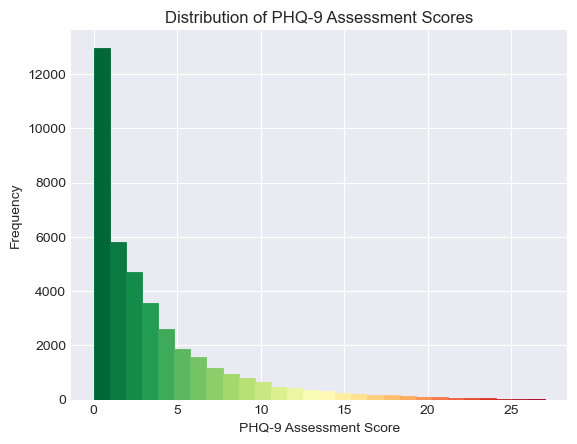

In [135]:
from matplotlib.cm import RdYlGn_r
cmap1 = RdYlGn_r.resampled(28)

fig, ax = plt.subplots()

# Creating a histogram from all Assessment Total Values (without the NAs)
ax.hist(phq9["Assessment Total"].values.dropna(), bins = 28, edgecolor = "black", linewidth = 0.6)

# Setting Labels and Title
ax.set_xlabel("PHQ-9 Assessment Score")
ax.set_title("Distribution of PHQ-9 Assessment Scores")
ax.set_ylabel("Frequency")

# Coloring the Bars of the Histogram
for ind in range(28):
    bar = ax.get_children()[ind]
    bar.set_color(cmap1(ind))

plt.show()

The distribution is heavily skewed to the right, and we can see that there is a much larger proportion of green bars than yellow and red bars. 

This tells us that, between 2005 and March 2020, it is much more likely for an American adult to have a low PHQ-9 assessment score than a high score. 

Below, we can see the relative frequency of each assessment score converted into percentages.

In [136]:
np.round(phq9["Assessment Total"].value_counts() / phq9["Assessment Total"].value_counts().sum(), 4)* 100

Assessment Total
0     32.88
1     14.71
2     11.93
3      9.06
4      6.57
5      4.74
6      3.96
7      2.97
8      2.41
9      1.97
10     1.61
11      1.2
12     1.08
13     0.86
14     0.79
15     0.62
16     0.51
17     0.45
18     0.42
19     0.33
21     0.23
20      0.2
22     0.14
24     0.12
23     0.11
25     0.06
27     0.05
26     0.03
Name: count, dtype: Float64

Now, let's look at the distributions by cycle, colored in the same manner as above.

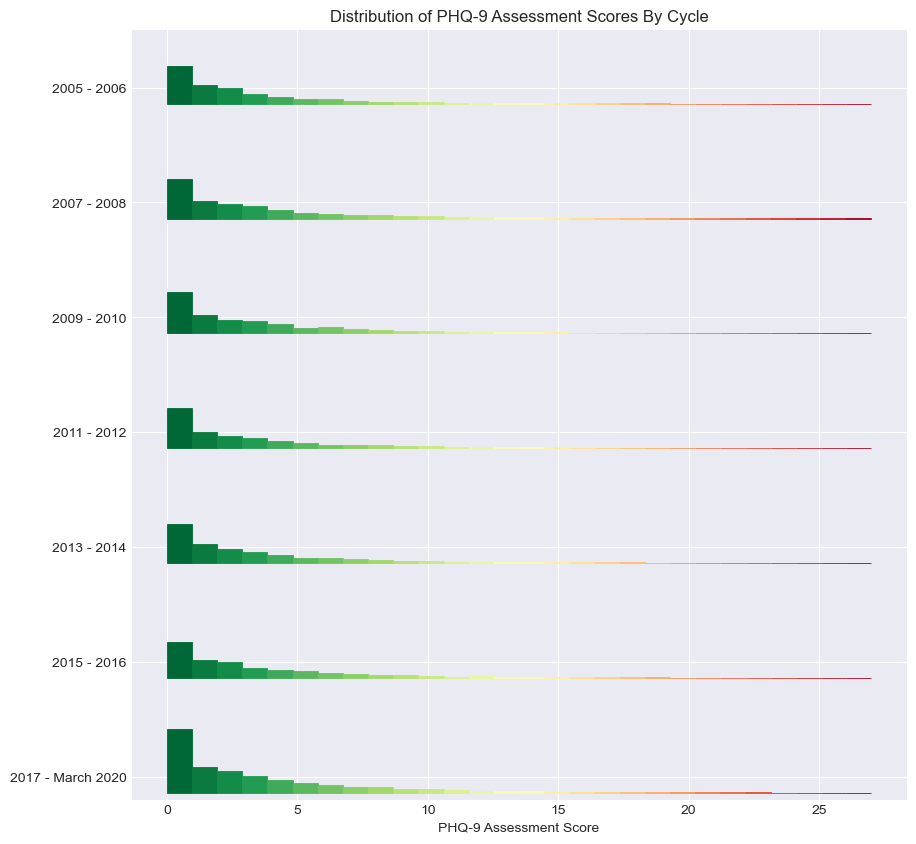

In [137]:
# First, we create a list of sorted cycle names.
cycle_names =  list(  phq9["Cycle"].value_counts().sort_index().index   )

# The variable that will contain the y coordinate for the bottom of each histogram
bottom = 300

fig, ax = plt.subplots(figsize = (10,10))


# Plotting from 2017 - March 2020 to 2005 - 2006, so that 2005-2006 appears at the top
for ind, cycle in enumerate(reversed(cycle_names)):
    
    # Getting the given cycle's assessment totals (without the NaNs)
    cond = phq9["Cycle"] == cycle 
    arr = phq9.loc[cond , "Assessment Total"].values
    arr = arr.dropna()
    
    # Plotting results with the correct bottom
    plt.hist(arr, bottom = bottom, bins = 28, edgecolor = "black", linewidth = 0.6)
    
    # Increment the y coordinate for the bottom of the next histogram
    bottom += 5000

    
    
# Coloring the Bars
## Get each object in the ax that is a rectangle (Histogram bars are rectangle objects)
bars = [child    for child in ax.get_children()    if "Rectangle" in str(type(child)) ]

## Drop the last rectangle object, as it is not a histogram bar
bars = bars[:-1]

## Color the histogram bars
for cycle_num in range(len(cycle_names)):
    for ind in range(28):
        bar = bars[ind + 28*cycle_num]
        bar.set_color(cmap1(ind))
        
# Adding y_ticks and labels, x_label, and title
ax.set_yticks([0] +  list(range(1000, 31001, 5000)), labels = [""] + list(reversed(cycle_names)))
ax.set_xlabel("PHQ-9 Assessment Score")
ax.set_title("Distribution of PHQ-9 Assessment Scores By Cycle")


plt.show()

The distribution of assessment scores, for each cycle, closely follows the same shape and general trend: small PHQ-9 assessment scores are significantly more likely than larger scores.

## Assessment Total Quantiles

The nth percentile is a number x such that n% of the data is at or below x. For quantiles, we simply convert n from a percentage into a proportion.

For example, in the array `[1, 2, 3, 4, 5]`, 3 is the 60th percentile and 0.6th quantile.

In [139]:
print(np.quantile([1, 2, 3, 4, 5], 0.6, method = "closest_observation"))
print(np.percentile([1, 2, 3, 4, 5], 60, method = "closest_observation"))

3
3


For each cycle, let's consider the quantile for each value of n between 0.1 and 1 (in increments of 0.05).

In [140]:
# Range of proportions (values of n) to use
n_range = np.arange(0.1, 1.01, 0.05)

# Due to computer rounding error, the last value isn't quite 1. Here we fix that.
n_range[-1] = 1

# Find the quantile data. Each (i, j) entry will be the quantile for the ith cycle and jth value of n
quantile_data = np.zeros(  (  len(cycle_names), len(n_range)  ), dtype = int)

for ind, cycle in enumerate(cycle_names):
    ## Save the assessment totals from the current cycle without the nans
    cond = phq9["Cycle"] == cycle
    assessment_total_vals = phq9.loc[cond, "Assessment Total"].values
    assessment_total_vals = assessment_total_vals.dropna()
    
    ## Find and save the corresponding quantiles.
    quantile_data[ind, :] = np.quantile(assessment_total_vals, n_range, method = "closest_observation")
    
print(quantile_data)

[[ 0  0  0  0  0  1  1  1  1  2  2  3  3  4  5  6  7 10 27]
 [ 0  0  0  0  0  1  1  1  2  2  3  3  4  5  6  7  9 13 27]
 [ 0  0  0  0  0  1  1  1  2  2  3  3  4  5  6  7  9 13 27]
 [ 0  0  0  0  0  0  1  1  2  2  2  3  4  4  5  7  9 13 27]
 [ 0  0  0  0  0  1  1  1  2  2  3  3  4  5  6  7  9 13 27]
 [ 0  0  0  0  0  1  1  1  2  2  3  3  4  5  5  7  9 12 27]
 [ 0  0  0  0  0  1  1  1  2  2  3  3  4  5  6  7  9 12 27]]


Looking at the raw data, we can already see that each row (each cycle) is very similar to each other.

More visually:

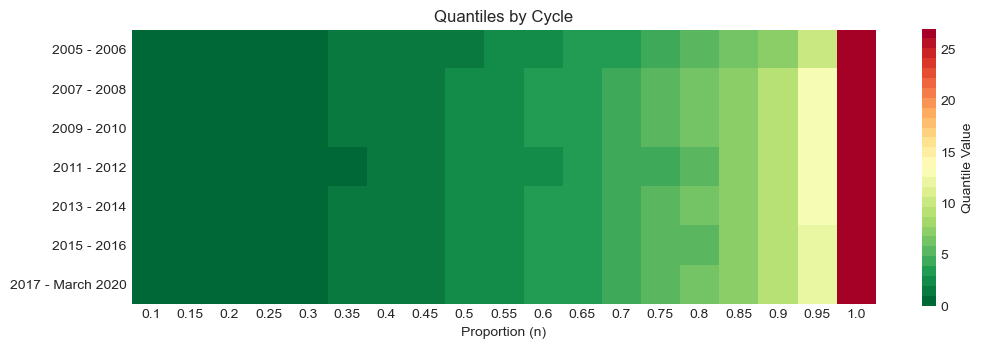

In [141]:
# Color quantile_data
plt.imshow(quantile_data, vmin = 0, vmax = 27, cmap = cmap1)

# Create color bar and add color bar label
cbar = plt.colorbar(shrink = 0.72)
cbar.set_label("Quantile Value")

# Add xlabel, xtick labels, and ytick labels
plt.xlabel("Proportion (n)")
plt.xticks(np.arange(0, 18.6, 1),  labels = np.round(n_range, 2))
plt.yticks(range(7),  minor = False, labels = cycle_names)

# Remove grid
plt.grid(False)

# Increase Figure Size
fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title("Quantiles by Cycle")
plt.show()

Here, we can see that the quantiles are almost identical for each cycle.

## Distribution of Test Results

We might expect that, because the distribution of assessment scores are similar for each cycle, the distribution of assessment results are also similar. 

We can verify this by creating a grouped bar chart, where each bar represents an assessment result and each grouping represents a cycle.

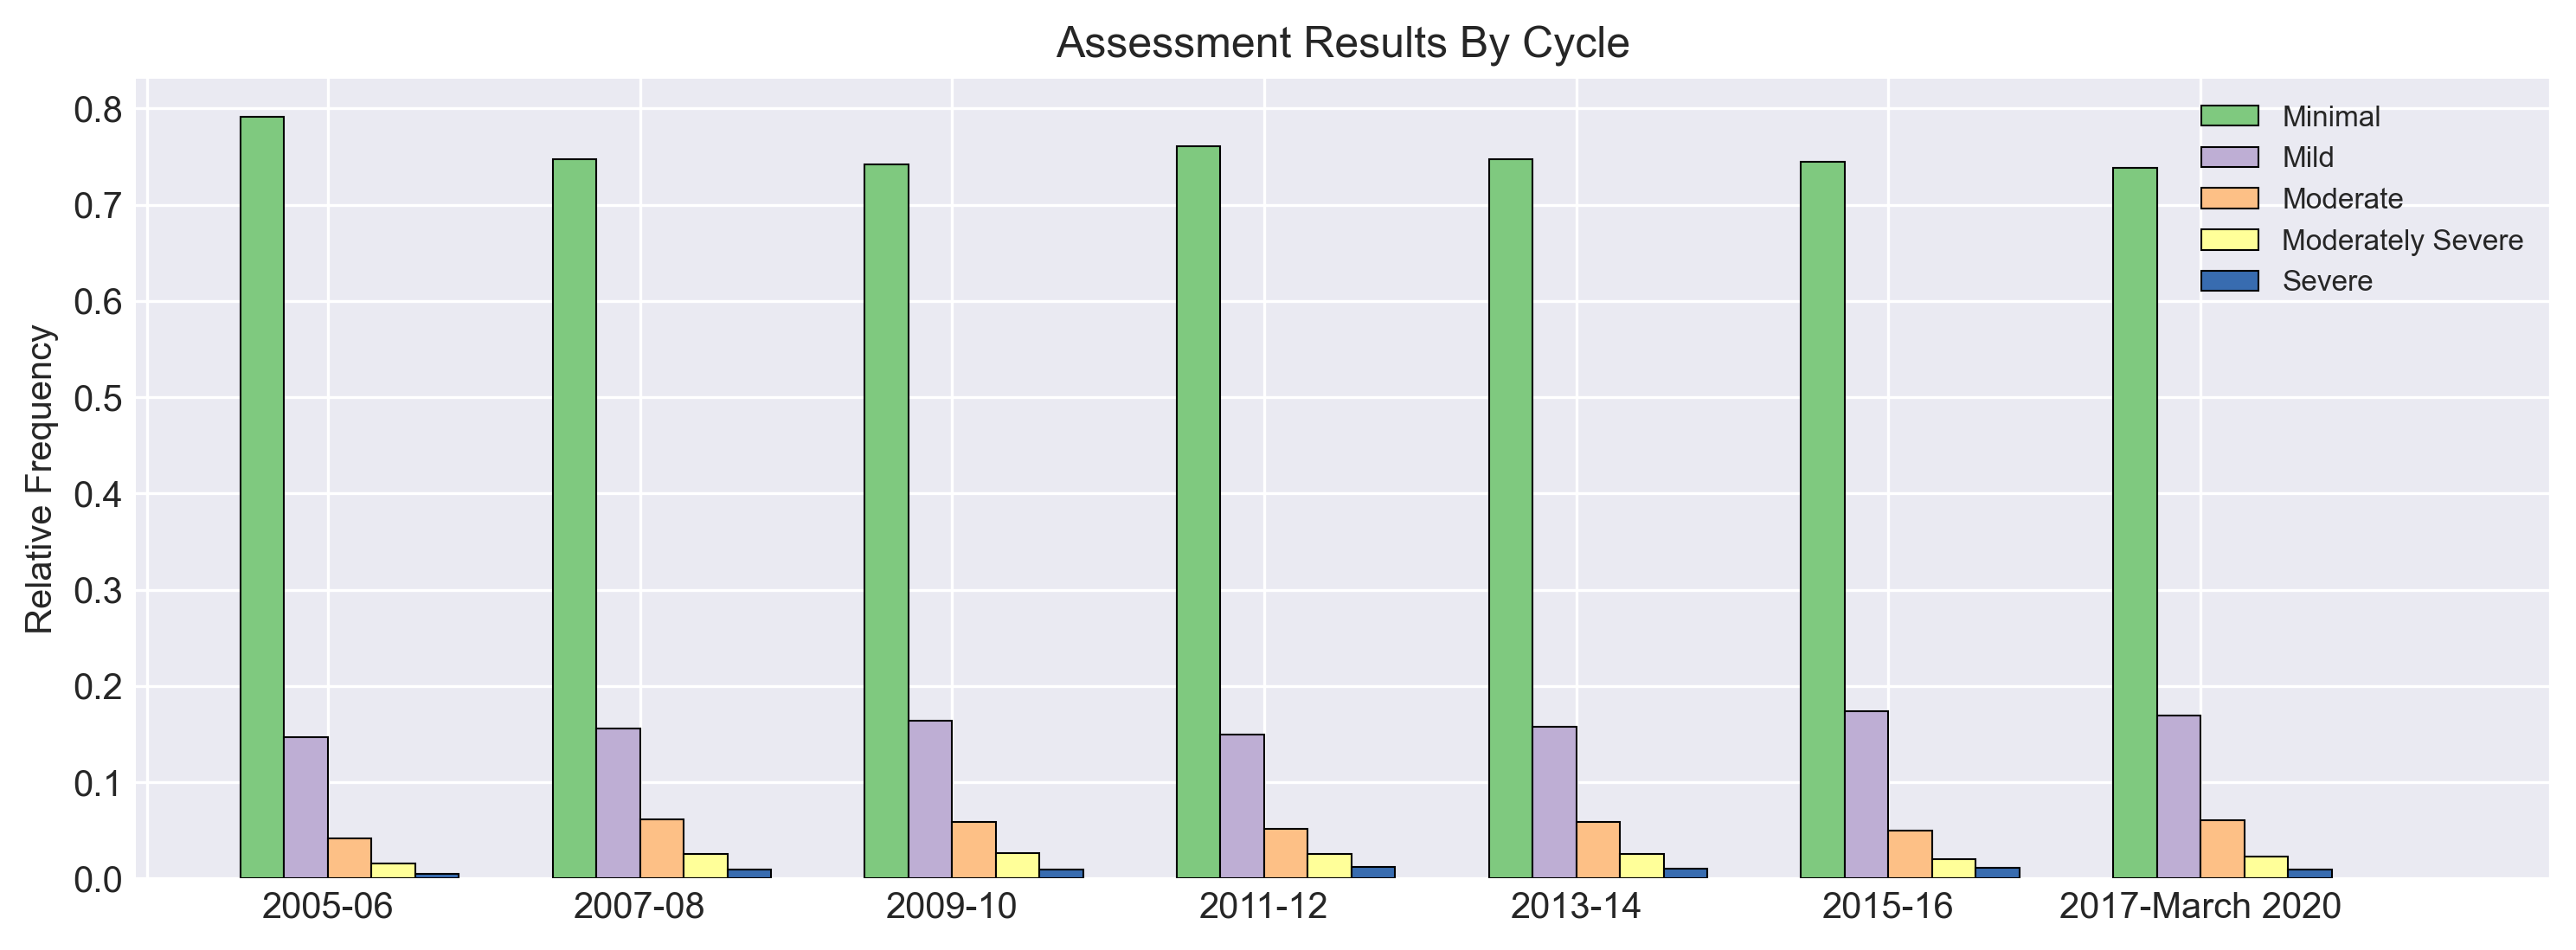

In [142]:
# This is the color palette we will use to color each assessment result
from matplotlib.cm import Accent

width = 0.7      # Width of each bar
space = 1.5       # Space between Groups
start = 1         # x-coordinate where the first bar will be drawn


# ------------------------------------------------------------------------

unique_assessment_result_vals    = phq9["Assessment Results"].dropna().unique()
group_values                     = ["2005-06", "2007-08", "2009-10", "2011-12", "2013-14", "2015-16", "2017-March 2020"]


# Initialize bar locations
## The (i, j) element in this matrix is the x_coordinate of the left edge of the bar for the
##     ith group value and jth assessment result
locations = np.zeros(    (  len(group_values), len(unique_assessment_result_vals)  )   )

for i in range(len(group_values)):
    bar_locations_in_group = []
    
    ## For each bar (assessment result) in each group
    ## Add its start location and then increment start to be itself + the width of the bar
    for j in range(len(unique_assessment_result_vals)):
        bar_locations_in_group.append(round(start, 1))
        start += width
        
    locations[i, :] =  np.array(bar_locations_in_group)
    
    # We've found all bar locations for this group; now we move on to the next: Add the space between groups 
    start += space

    
# Create Figure
fig, ax = plt.subplots(figsize= (12, 4), dpi = 300)

## Find the number of respondents in each cycle (remove NAs)
cond = ~phq9["Assessment Results"].isna()
cycle_sum = phq9.loc[cond, "Cycle"].value_counts().sort_index().values

## Plot each bar one Assessment Result at a time
for ind, result_name in enumerate(unique_assessment_result_vals):
    cond = phq9["Assessment Results"] == result_name
    result_by_cycle = phq9.loc[cond, "Cycle"].value_counts().sort_index()
    
    ### Scale result_by_cycle so we get a proportion instead of a frequency
    result_by_cycle /= cycle_sum
    
    ## Plot
    ax.bar(locations[:, ind],  result_by_cycle.values , align = "edge", width = width, 
           label = result_name, color = Accent.colors[ind], edgecolor="black", linewidth = 0.5)

# Add group labels (xtick labels), title, legend, and y label
centers = np.median(locations, axis = 1)

## Add extra padding so that the legend won't cover the data
centers = [-0.5, *list(centers), 38]
ax.set_xticks(centers, labels = ["", *group_values, ""])

ax.set_title("Assessment Results By Cycle")

ax.legend(fontsize = 8)

ax.set_ylabel("Relative Frequency")

plt.show()

As expected, for each cycle, there seems to be roughly the same proportion of each assessment result.

We also see the same trend: less severe results are much more common. In fact, for each cycle, over 70% of respondents have a Minimal Depression" result. For each cycle, less than 1% of respondents received the results of "Severe Depression".

In [143]:
total = phq9["Cycle"].value_counts().sort_index().values.reshape(-1, 1)

(pd.crosstab(phq9.Cycle, phq9["Assessment Results"])[["Severe"]] / total * 100).rename({"Severe": "Severe (%)"}, axis = 1)

Assessment Results,Severe (%)
Cycle,
2005 - 2006,0.475600
2007 - 2008,0.917936
2009 - 2010,0.897183
2011 - 2012,1.212366
2013 - 2014,1.056142
2015 - 2016,1.065066
2017 - March 2020,0.902962


However, it is very important to note that, while 1% is not a large percentage, it is still a large amount of people when applied to the American adult population. 

For example, out of 250 million people [(approximately the number of Americans 20 years or older in 2019)](https://usafacts.org/data/topics/people-society/population-and-demographics/our-changing-population/), 1% would be 2.5 million people.

Nevertheless, assuming that the PHQ-9 data doesn't suffer from significant [social desirability bias](https://pubmed.ncbi.nlm.nih.gov/28511097/), this data implies that it was very unlikely for the average American adult to frequently suffer from multiple of the 9 problems in a given 2 weeks between 2005 and March 2020.

In all three cases, we seen that the PHQ-9 data has remained relatively constant throughout the years. This means that the data between 2005 and March 2020 will make a great baseline for comparing with post-pandemic data; we will be able to more easily see what has increased and what has remained constant.

**Summary**

* The distribution of PHQ-9 assessment scores is right-skewed, irrespective of the cycle. Low scores on the PHQ-9 are extremely common. 
* For each cycle, over 70% of respondents have the "Minimal Depression" result. Around 1% have the "Severe Depression" result.
* The distribution of PHQ-9 assessment scores and assessment results have remained relatively constant over the years.

# Q2. Which of the 9 problems were the most rare and the most common?

One method of answering this question is by determining, for each of the 9 problems, what percentage of respondents answered at least 1?

We will answer this question by first converting each of the 9 columns into binary columns, where
* an entry of 0 indicates a response of 0 
* an entry of 1 is given otherwise

We will call this df `phq9_01`

In [144]:
phq9_01 = phq9.iloc[:, 0:9].copy()

for col in phq9_01:
    cond = (phq9_01[col] != 0) & (~phq9_01[col].isna())
    phq9_01.loc[cond, col] = 1

Let's consider the data all together, irrespective of cycle, and see which of the 9 problems were the most rare and the most common.

Since the column names are long, we will label each column with the letter "P" followed by the column number. For example, the label for column 1, "Little interest in doing things", is "P1". 

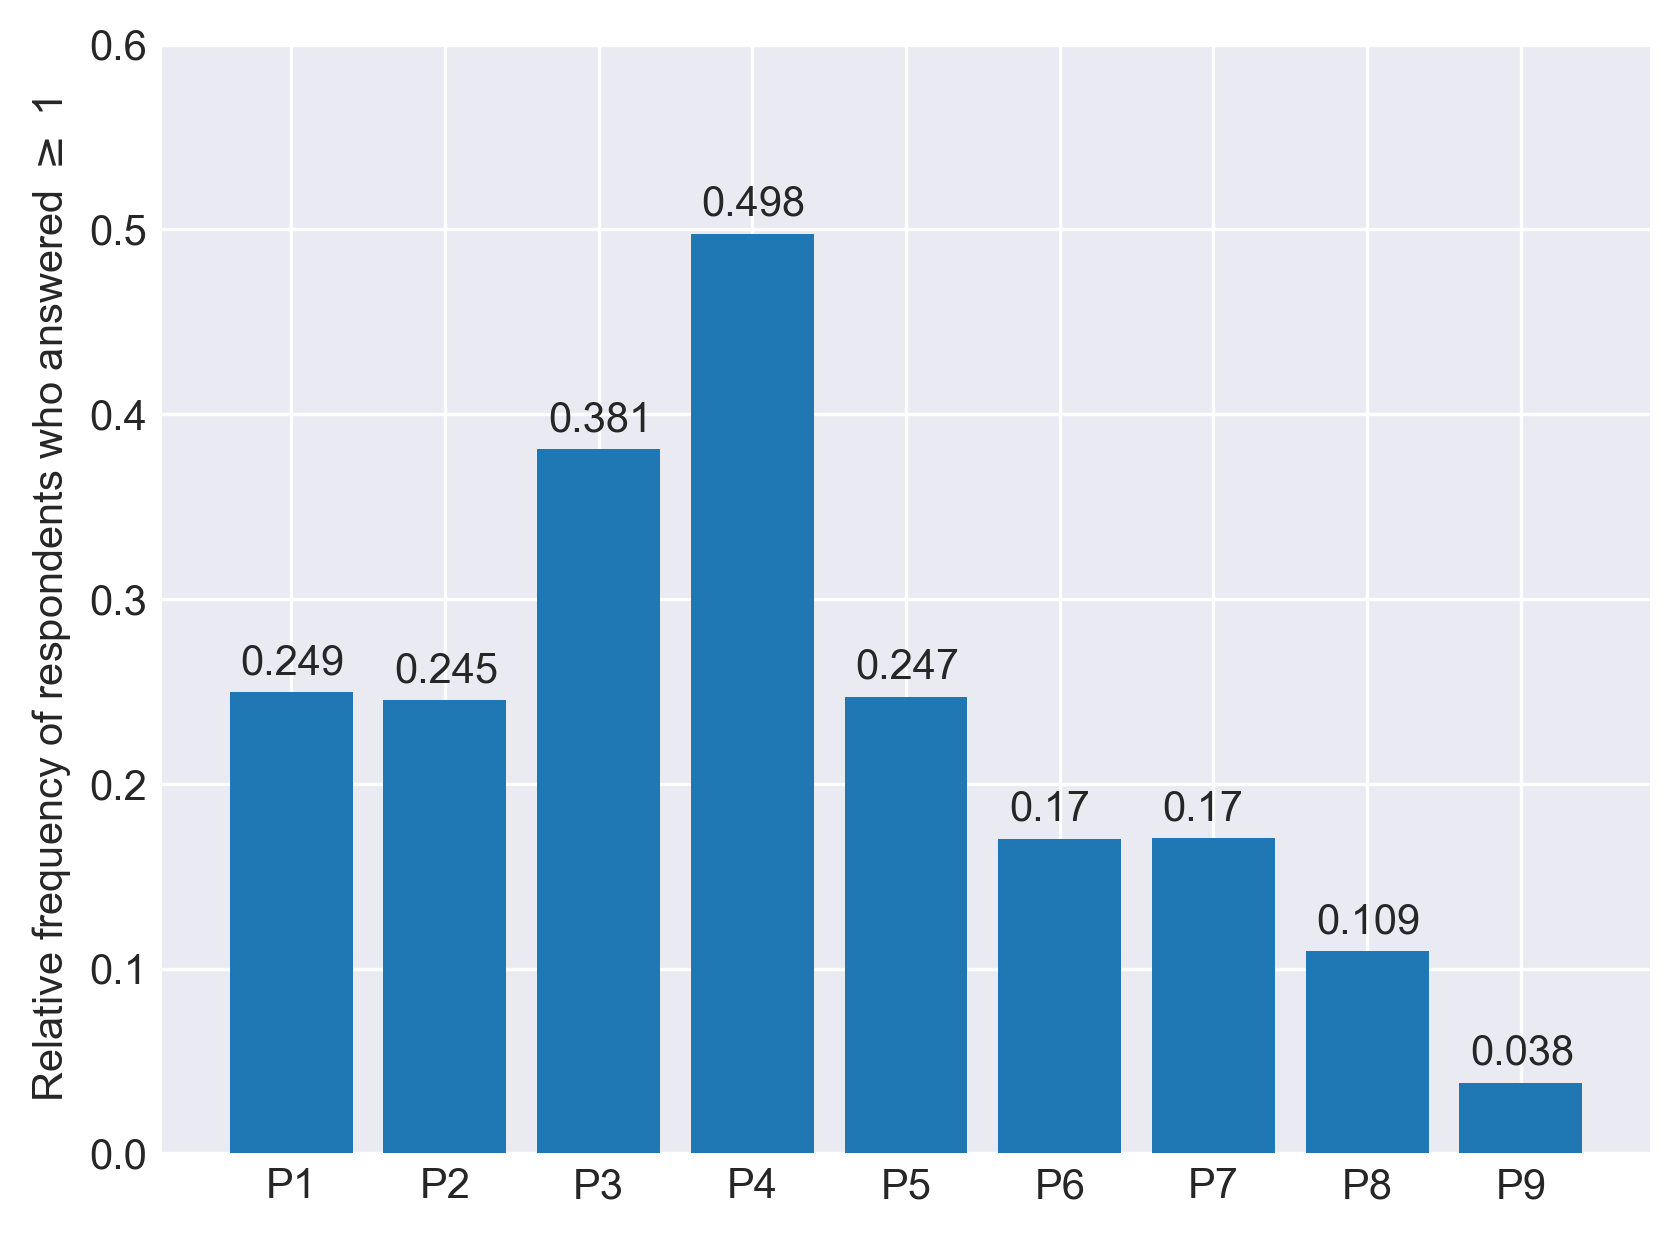

In [145]:
labels = ["P"+ str(i)  for i in range(1, 10)]
values = phq9_01.sum().values / len(phq9_01)
fig, ax = plt.subplots(dpi = 300)

bars = ax.bar(labels, values)

# Labels
ax.set_yticks(np.arange(0, 0.61, 0.1))
ax.set_ylabel(r"Relative frequency of respondents who answered $\geq$ 1")
ax.set_xticks(range(0, 9))

# Add the proportion above the bar
for x, bar, proportion in zip(range(0, 9), bars, values):
    ax.text(x - 0.33, bar.get_height() + 0.01, np.round(proportion, 3))
    
plt.show()

Almost half of all respondents answered at least 1 to Problem 4 (Feeling tired or having little energy). 

It is followed by Problem 3 (Trouble sleeping or sleeping too much). 

This also shows us that for each problem 1-5, at least 20% of respondents answered 1 or greater. This implies that, in a given 2 weeks, each of the five problems affected over 20% of American Adults at least several of the days.

The two least common problems are Problem 8 (Moving or speaking slowly or too fast) and Problem 9 (Thought you would be better off dead). 

Around 3% of respondents answered 1 or greater to Problem 9. Out of 250 million people, this would translate to over 7 million American adults thinking they were better off dead at least several days in a given 2 weeks.

Let's now consider the distribution with respect to each cycle.

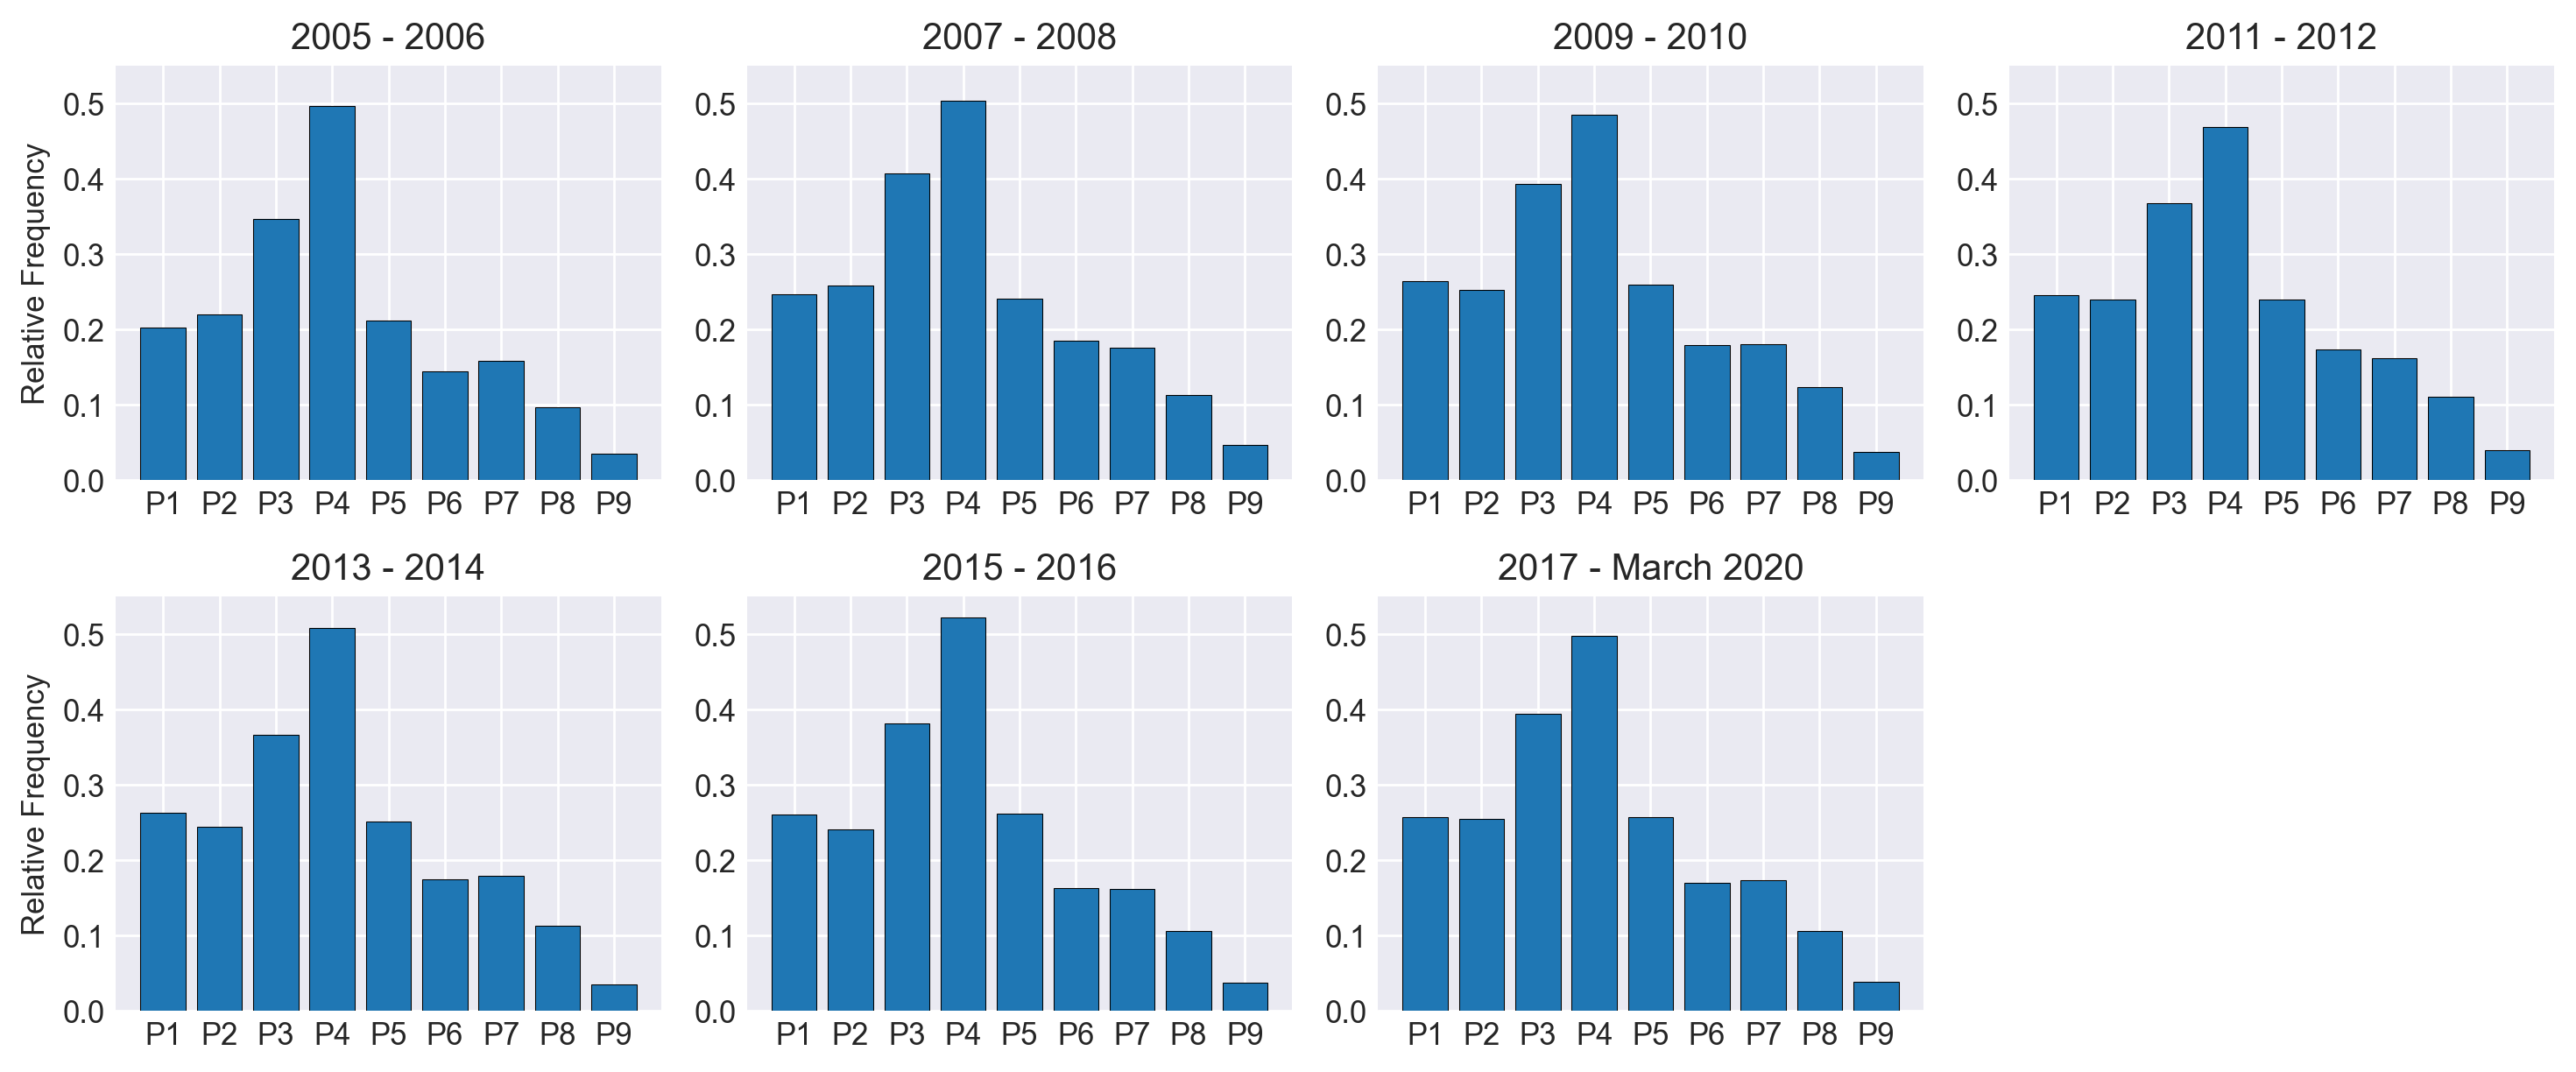

In [146]:
phq9_01["Cycle"] = phq9["Cycle"].copy()

cycles_sum = phq9["Cycle"].value_counts().sort_index()


fig, axes = plt.subplots(2, 4, figsize = (12,5), dpi = 250)
axes = axes.ravel()

for ind, cycle in enumerate(cycle_names):
    # Get phq9_01 data for a specific cycle
    phq9_01_by_cycle = phq9_01[ phq9_01.Cycle == cycle  ]
    
    # Get the total number of each person who answered 1 or greater for each of the 9 problems during the current cycle
    values = phq9_01_by_cycle.iloc[:, 0:9].sum().values
    
    # Create a bar chartl Divide by the values by the total number of people in the cycle
    axes[ind].bar(labels, values/cycles_sum[cycle], linewidth = 0.3, edgecolor = "black")
    
    # Add title, ylabel, and set y limits
    axes[ind].set_title(cycle)
    axes[ind].set_ylim([0, 0.55])
    if ind in [0, 4]:
        axes[ind].set_ylabel("Relative Frequency")
    
fig.tight_layout()
fig.delaxes(axes[7])

We can see that each distribution takes on a very similar shape.

We can also see which problem is the most rare and most common for each result in `Assessment Results`.

In [147]:
phq9_01["Assessment Results"] = phq9["Assessment Results"].copy()

results_sum = phq9["Assessment Results"].value_counts()
results_sum

Assessment Results
Minimal              29654
Mild                  6337
Moderate              2189
Moderately Severe      917
Severe                 370
Name: count, dtype: int64

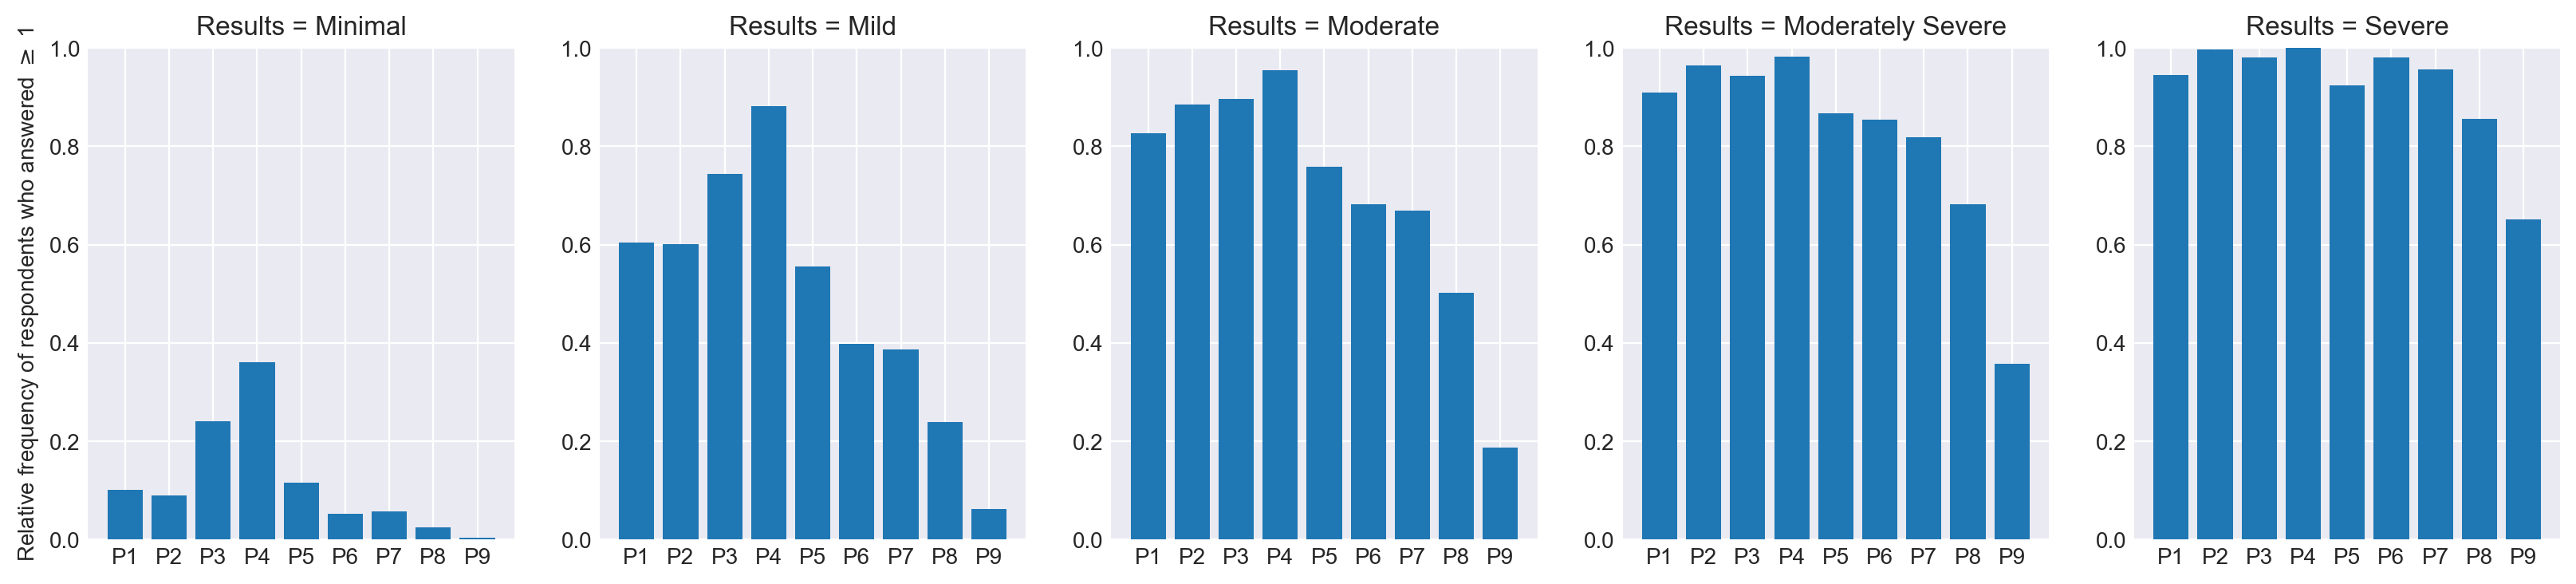

In [148]:
labels = ["P"+ str(i)  for i in range(1, 10)]

fig, axes = plt.subplots(1, 5, figsize = (20, 4), dpi = 200)

for ind, result in enumerate(['Minimal', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']):
    # Get phq9_01 data for the people who had the current assessment result
    phq9_01_by_result = phq9_01[  phq9_01["Assessment Results"] == result  ]
    
    # Out of those who had the current assessment result
    # Get the total number of each person who answered 1 or greater for each of the 9 problems 
    values = phq9_01_by_result.iloc[:, 0:9].sum().values
    
    # Create a bar chart; divide the value by the total number of people who had the current assessment result
    axes[ind].bar(labels, values/results_sum[result])
    
    # add ylabel, title and ylimits
    axes[ind].set_title(f"Results = {result}")
    axes[ind].set_ylim([0, 1])
    if ind==0:
        axes[ind].set_ylabel(r"Relative frequency of respondents who answered $\geq$ 1")

For respondents who received "Minimal" and "Mild" results, P3 and P4 are typically among the most common problems that would have an answer of 1 or greater. As the depression severity increases, the distribution becomes more uniform; all problems become more likely to have an answer of 1 or greater.

We see that, regardless of depression severity, P8 and P9 are the least likely to have an answer of 1 or greater.

While it makes sense that P9 would become more likely as depression severity increased, one observation that I found surprising was how strong of an indicator P8 is for depression severity. Problem 8 is unlikely to have answers of 1 or greater for a respondent who has "Minimal" or "Mild" results.

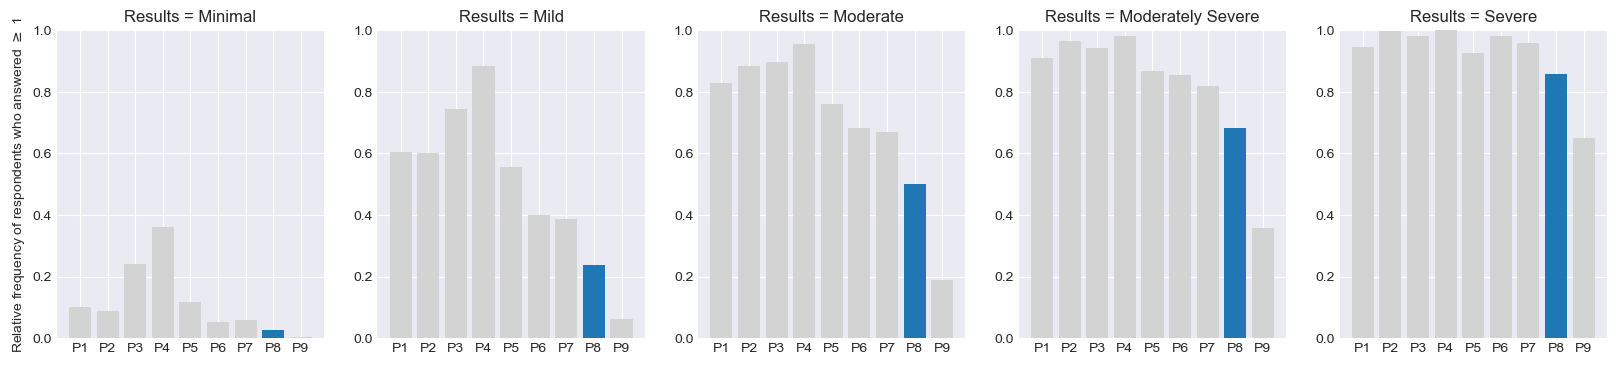

In [149]:
fig, axes = plt.subplots(1, 5, figsize = (20, 4))

for ind, result in enumerate(['Minimal', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']):
    # Get phq9_01 data for the people who had the current assessment result
    phq9_01_by_result = phq9_01[  phq9_01["Assessment Results"] == result  ]
    
    # Out of those who had the current assessment result
    # Get the total number of each person who answered 1 or greater for each of the 9 problems 
    values = phq9_01_by_result.iloc[:, 0:9].sum().values
    
    # Create a bar chart; divide the value by the total number of people who had the current assessment result
    # Color all bars gray accept for P8
    axes[ind].bar(labels, values/results_sum[result], color = [*["lightgray"]*7, "tab:blue", "lightgray"])
    
    # add ylabel, title and ylimits
    axes[ind].set_title(f"Results = {result}")
    axes[ind].set_ylim([0, 1])
    if ind==0:
        axes[ind].set_ylabel(r"Relative frequency of respondents who answered $\geq$ 1")

**Summary**

* "Trouble sleeping or sleeping too much" and "Feeling tired or having little energy" were the two most common problems, irrespective of cycle.
* "Moving or speaking slowly or too fast" and "Thought you would be better off dead" were the two least common problems, irrespective of cycle and `Assessment Result`.

# Q3. For each problem, how likely was each answer?

The following grouped bar chart shows us, for each problem, how likely each answer was.

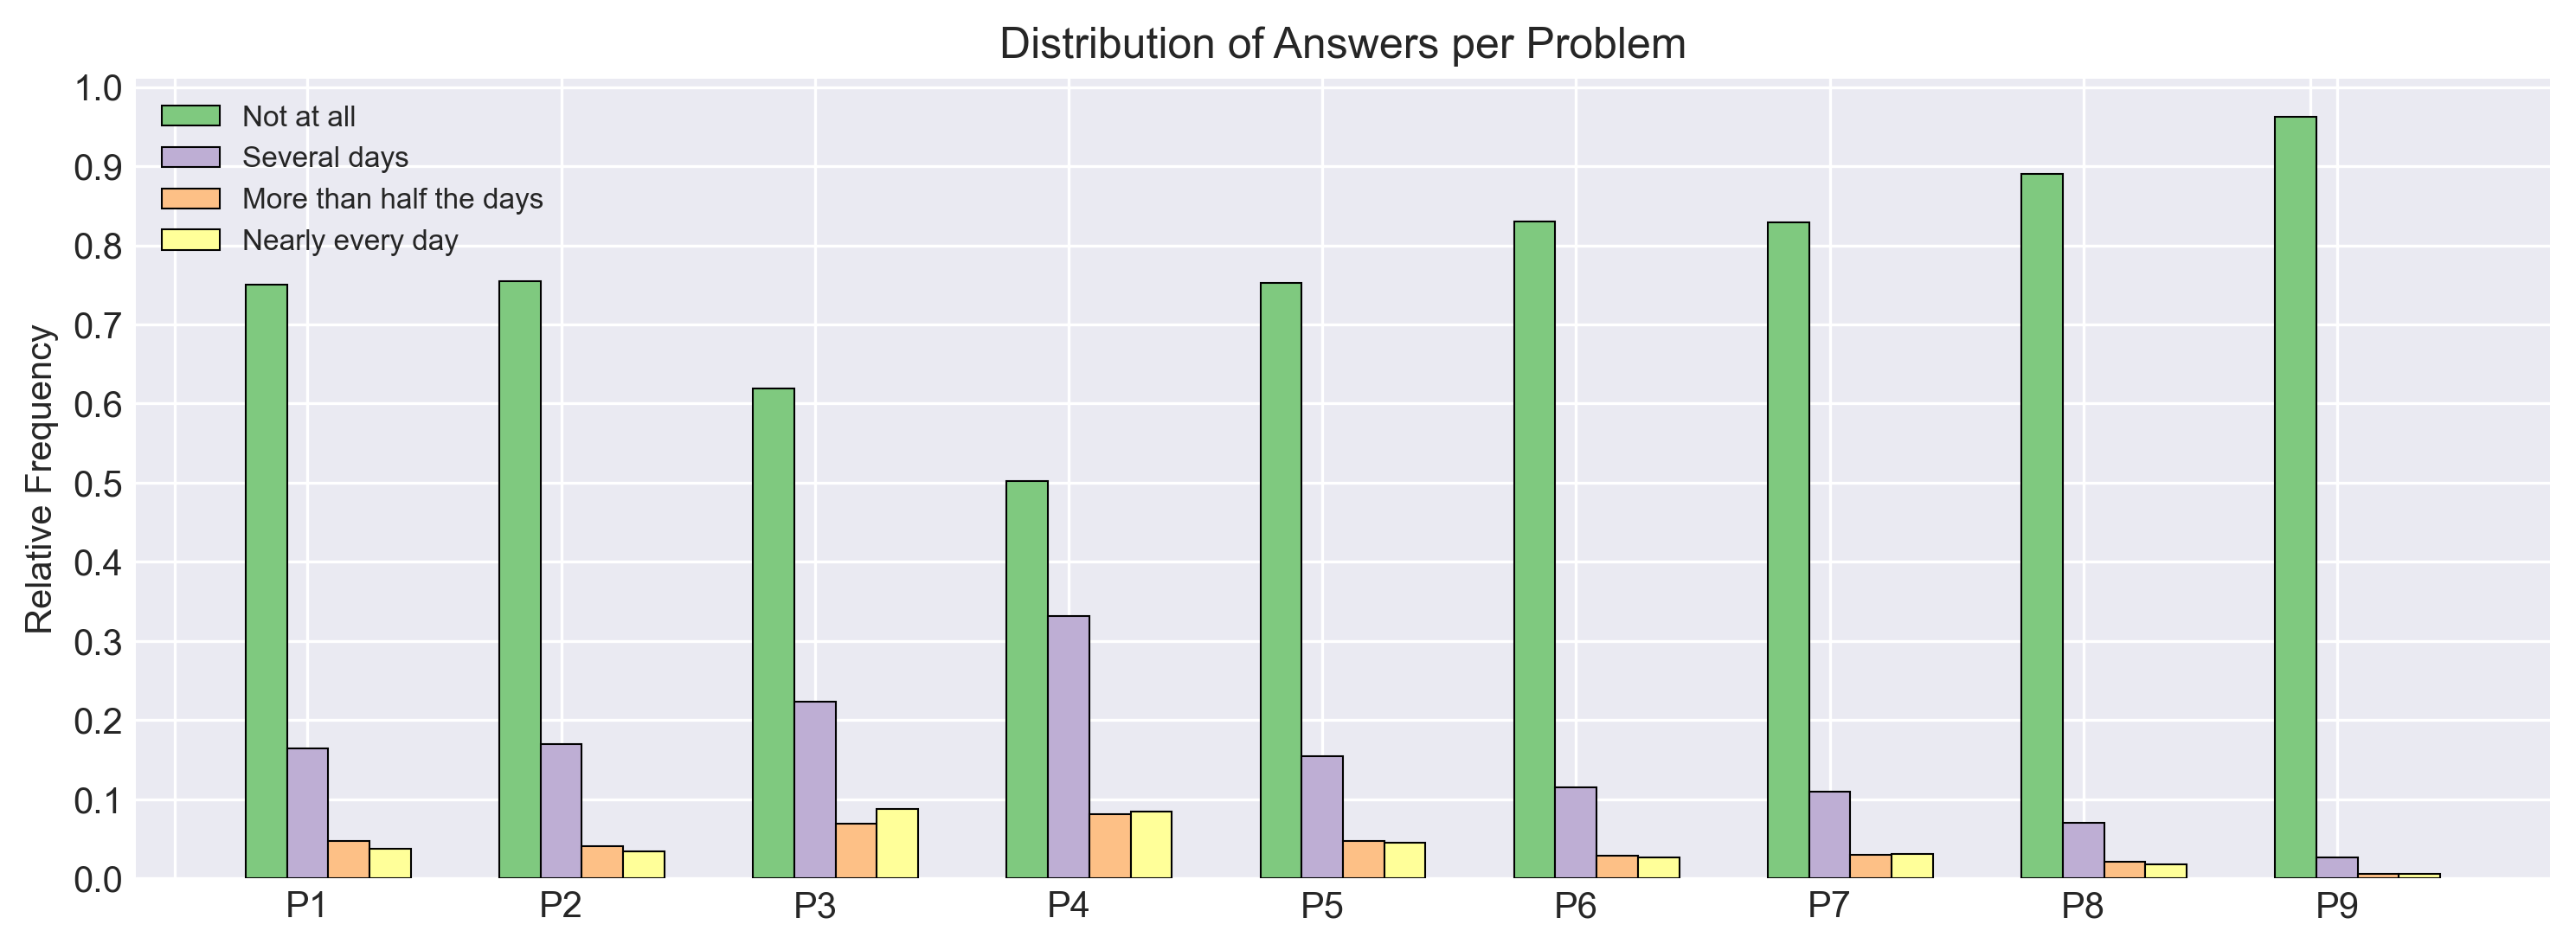

In [150]:
width = 0.7       # Width of each bar
space = 1.5       # Space between Groups
start = 1         # x-coordinate where the first bar will be drawn

# ------------------------------------------------------------------------




unique_answers   = [0, 1, 2, 3]
group_values     = ["P"+str(i)  for i in range(1, 10)]
bar_labels       = ["Not at all", "Several days", "More than half the days", "Nearly every day"]

# Initialize bar locations
## The (i, j) element in this matrix is the x_coordinate of the left edge of the bar for the
##     ith group value and jth unique answer
locations = np.zeros(    (  len(group_values), len(unique_answers)   )  )   

for i in range(len(group_values)):
    bar_locations_in_group = []
    
    ## For each bar (answer) in each group
    ## Add its start location and then increment start to be itself + the width of the bar
    for j in range(len(unique_answers)):
        bar_locations_in_group.append(round(start, 1))
        start += width
        
    locations[i, :] =  np.array(bar_locations_in_group)
    
    # We've found all bar locations for this group; now we move on to the next: Add the space between groups 
    start += space

    
    
# Create Figure
fig, ax = plt.subplots(figsize= (12, 4), dpi = 300)

# We will create bar one value of unique_answers at a time (per question)
# We will divide the array by the total number of people who answered the questions to have the rel. req
totals = np.array([len(phq9[col].dropna())  for col in phq9.iloc[:, 0:9]], dtype = float)

## Plot each bar one value at a time
for ind, answer in enumerate(unique_answers):
    
    # Find the frequency of answers per problem
    freq_answers_per_problem = []
    for col in phq9.iloc[:, 0:9]:
        freq_answers_per_problem.append(phq9[col].value_counts()[answer])
        
    # Find the relative frequency
    values = np.array(freq_answers_per_problem, dtype = float) / totals

    ## Plot
    ax.bar(locations[:, ind],  values , align = "edge", width = width, 
           label = bar_labels[answer], color = Accent.colors[ind], edgecolor="black", linewidth = 0.5)

# Add group labels (xtick labels), title, legend, and y label
centers = np.median(locations, axis = 1)

## Add extra padding so that the legend won't cover the data
centers = [-0.2, *list(centers), 36]
ax.set_xticks(centers, labels = ["", *group_values, ""])

ax.set_title("Distribution of Answers per Problem")

ax.legend(fontsize = 8)

ax.set_ylabel("Relative Frequency")
ax.set_yticks(np.round(np.arange(0, 1.01, 0.1), 2))
plt.show()

**Summary**
* "Not at all" was the most common response for every problem
* The proportion of "More than half the days" responses are similar to the proportion of "Nearly every day" responses
* For each problem, the proportion of respondents who experienced the problem "Every day" is less than 0.10.

# 4. Out of those who answered "Somewhat difficult", "Very difficult", or "Extremely difficult" to the final question, how many were seeking help from a mental health professional?

For every result group in `Assessment Results`, there were respondents who stated that the problems they were facing caused difficulty in their lives.

The following bar chart shows the proportion of respondents, in each result group, who responded 1 or greater to question 10 ("If you checked off any problems, how difficult have these problems made it for you to do your work, take care of things at home, or get along with other people?")

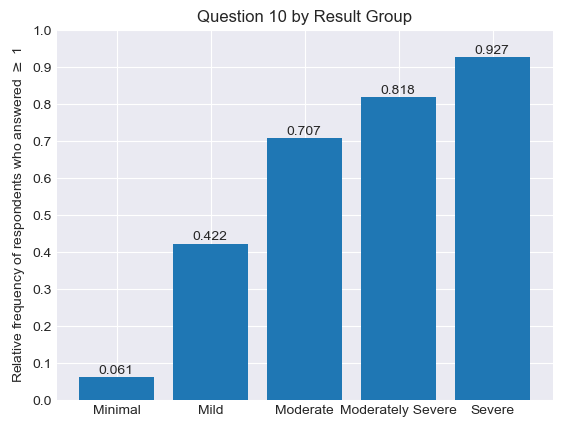

In [151]:
# Creating a dataframe phq9_d that contains only respondents who hare experiencing difficulty
phq9_d = phq9[ phq9.iloc[:, 9] > 0 ].copy()

# Get the assessment results value counts from phq9, ordered appropriately
series = phq9_d["Assessment Results"].value_counts()[["Minimal", "Mild", "Moderate", "Moderately Severe", "Severe"]]
# Turn the frequencies into relative frequencies
values = series.values / results_sum.values
labels = series.index

bars = plt.bar(labels, values)

# Add the proportion above the bar
for x, bar, proportion in zip(range(0, 5), bars, values):
    plt.text(x - 0.2, bar.get_height() + 0.01, np.round(proportion, 3))
    
# Add yticks and ylabels
plt.ylabel(r"Relative frequency of respondents who answered $\geq$ 1")
plt.title("Question 10 by Result Group")
plt.yticks(np.arange(0, 1.01, 0.1))
plt.show()

Over 70% of respondents, who received "Moderate", "Moderately Severe" or "Severe" results, stated that they had some degree of difficulty in doing their work, taking care of things at home, or getting along with others.

Let's take a closer look at the answers that respondents gave. Out of the respondents who answered 1 or greater to question 10, we have the following:

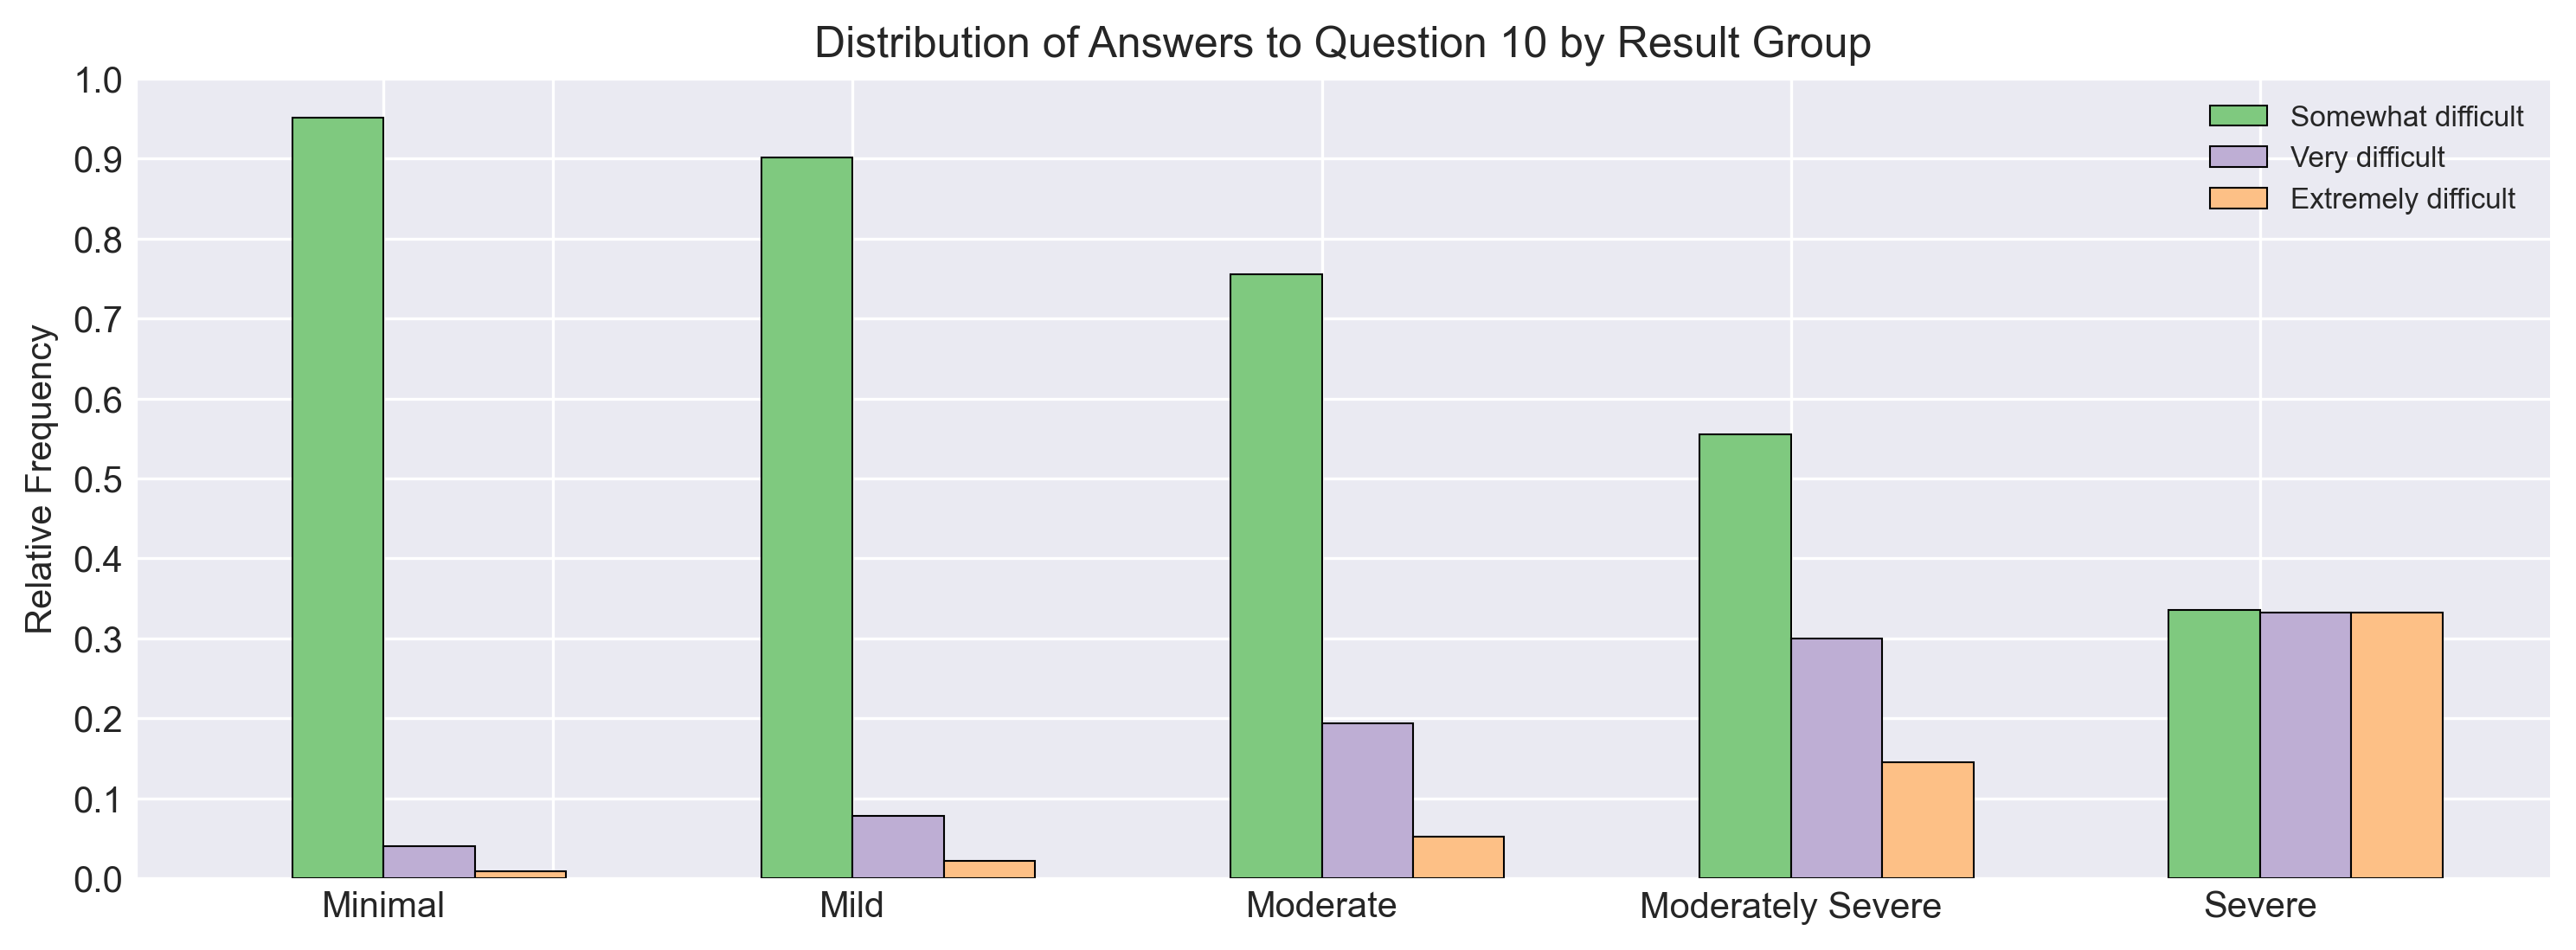

In [152]:
width = 0.7       # Width of each bar
space = 1.5       # Space between Groups
start = 1         # x-coordinate where the first bar will be drawn

# ------------------------------------------------------------------------


unique_answers   = [1, 2, 3]
group_values     = ["Minimal", "Mild", "Moderate", "Moderately Severe", "Severe"]
bar_labels = ["Somewhat difficult", "Very difficult", "Extremely difficult"]

# Initialize bar locations
## The (i, j) element in this matrix is the x_coordinate of the left edge of the bar for the
##     ith group value and jth unique answer
locations = np.zeros(    (  len(group_values), len(unique_answers)   )  )   

for i in range(len(group_values)):
    bar_locations_in_group = []
    
    ## For each bar (answer) in each group
    ## Add its start location and then increment start to be itself + the width of the bar
    for j in range(len(unique_answers)):
        bar_locations_in_group.append(round(start, 1))
        start += width
        
    locations[i, :] =  np.array(bar_locations_in_group)
    
    # We've found all bar locations for this group; now we move on to the next: Add the space between groups 
    start += space

    
# Create Figure
fig, ax = plt.subplots(figsize= (12, 4), dpi = 300)

totals = phq9_d["Assessment Results"].value_counts()[["Minimal", "Mild", "Moderate", "Moderately Severe", "Severe"]].values
## Plot each bar one value at a time
for ind, answer in enumerate(unique_answers):
    
    # Find the frequency of answers per result
    freq_answers_per_result = []
    for result in group_values:
        cond = phq9["Assessment Results"] == result
        freq_answers_per_result.append(phq9_d.iloc[:, 9][cond].value_counts()[answer])
        
    # Find the relative frequency
    values = np.array(freq_answers_per_result, dtype = float) / totals

    ## Plot
    ax.bar(locations[:, ind],  values , align = "edge", width = width, 
           label = bar_labels[answer - 1], color = Accent.colors[ind], edgecolor="black", linewidth = 0.5)

# Add group labels (xtick labels), title, legend, and y label
centers = np.median(locations, axis = 1)

## Add extra padding so that the legend won't cover the data
centers = [-0.2, *list(centers), 3]
ax.set_xticks(centers, labels = ["", *group_values, ""])

ax.set_title("Distribution of Answers to Question 10 by Result Group")

ax.legend(fontsize = 8)

ax.set_ylabel("Relative Frequency")
ax.set_yticks(np.round(np.arange(0, 1.01, 0.1), 2))
plt.show()

For someone who finds that these problems make it difficult for them to function, the next step might be seeking the help of a mental health professional. However, [due to reasons such as stigma and affordability,  many people do not seek the care they need](https://www.apa.org/monitor/2020/07/datapoint-care).

Here, we will consider the respondents who admit that the problems they have are causing some degree of difficulty in their lives, and we will determine what percentage of them have sought the help of a mental health professional.

To answer this question, we will need to get data that indicates which respondents were in therapy. 

This data is found in the "Questionnaire Data" > "Hospital Utilization & Access to Care" category for each cycle. Below is the combined data.

In [153]:
MHP = pd.read_csv("Data\MHProfessional.csv", index_col = "SEQN")
MHP

,HUQ090,Years
SEQN,,
31127,NaN,2005 - 2006
31128,2.0,2005 - 2006
31129,2.0,2005 - 2006
31130,2.0,2005 - 2006
31131,2.0,2005 - 2006
...,...,...
119258,2.0,2017 - March 2020
119259,2.0,2017 - March 2020
119260,2.0,2017 - March 2020


`HUQ090` is the code used by the CDC that represents whether or not the respondent saw a mental health professional in the past year. Possible values in this column are:

```
1  : Yes
2  : No
7  : I don't know
9  : Refused to answer
```

We will 

* Replace the 7s and 9s in this columns with NaN
* Convert the column into an integer data type
* Create a new data frame that merges `phq9_d` with `MHP`

In [154]:
MHP.loc[MHP.HUQ090 == 7, "HUQ090"] =np.nan
MHP.loc[MHP.HUQ090 == 9, "HUQ090"] =np.nan

In [155]:
MHP.HUQ090 = MHP.HUQ090.astype("Int32")

In [156]:
phq9_d = pd.merge(phq9_d, MHP[["HUQ090"]], left_index = True, right_index = True, how = "inner")
phq9_d

,Little interest in doing things,"Feeling down, depressed, or hopeless",Trouble sleeping or sleeping too much,Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself,Trouble concentrating on things,Moving or speaking slowly or too fast,Thought you would be better off dead,Difficulty these problems have caused,Cycle,Assessment Total,Assessment Results,HUQ090
SEQN,,,,,,,,,,,,,,
31143,0,1,1,1,1,1,1,0,0,1,2005 - 2006,6,Mild,2
31152,0,0,0,1,1,0,0,1,0,1,2005 - 2006,3,Minimal,2
31179,0,1,1,1,2,0,3,0,0,1,2005 - 2006,8,Mild,2
31192,0,0,0,1,1,0,0,0,0,1,2005 - 2006,2,Minimal,2
31205,1,1,1,1,0,1,0,0,0,1,2005 - 2006,5,Mild,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119234,1,1,3,2,0,1,0,0,1,1,2017 - March 2020,9,Mild,2
119240,3,2,0,3,3,0,0,0,0,1,2017 - March 2020,11,Moderate,2
119242,1,1,1,1,1,1,1,1,0,2,2017 - March 2020,8,Mild,2


The following shows the proportion of respondents (irrespective of cycle) who visited a mental health professional in the past year.

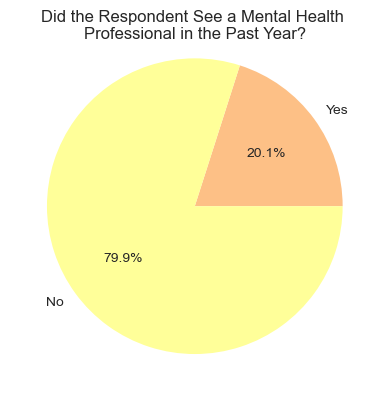

In [157]:
values = phq9_d["HUQ090"].value_counts().sort_index().values
labels = ["Yes", "No"]
plt.pie(values, labels = labels, autopct='%.1f%%', colors = Accent.colors[2:4])
plt.title("Did the Respondent See a Mental Health \nProfessional in the Past Year?", y = 0.93)

plt.show()

We can also see this by result group in `Assessment Results`.

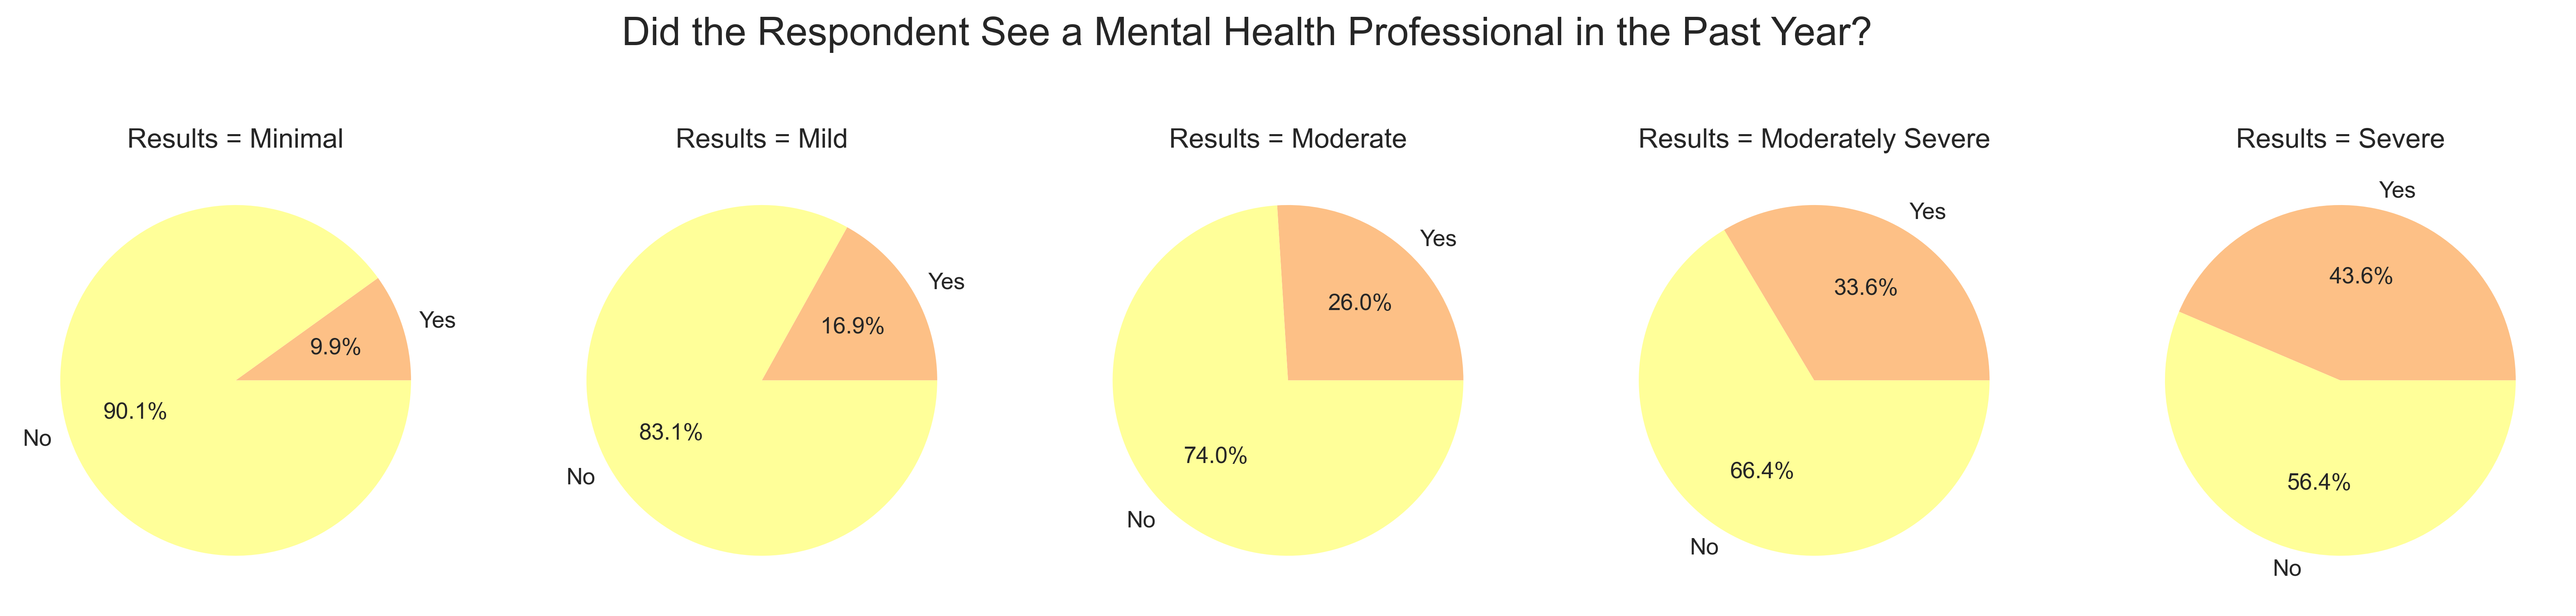

In [161]:
fig, axes = plt.subplots(1, 5, figsize = (20, 4), dpi = 400)
labels = ["Yes", "No"]
for ind, result in enumerate(['Minimal', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']):
    phq9_d_by_result = phq9_d[phq9_d["Assessment Results"] == result]
    values = phq9_d_by_result["HUQ090"].value_counts().sort_index().values
    axes[ind].pie(values, labels = labels, autopct='%.1f%%', colors = Accent.colors[2:4])
  

    axes[ind].set_title(f"Results = {result}")
suptitle = fig.suptitle("Did the Respondent See a Mental Health Professional in the Past Year?", fontsize = "xx-large", y = 1.05)

plt.show()

We can even focus our interest on respondents who answered "3", stating that the problems are causing them "extreme difficulty".

The percentage of those who saw a mental health professional is still under 50% for all result groups, with the exception of "Severe".

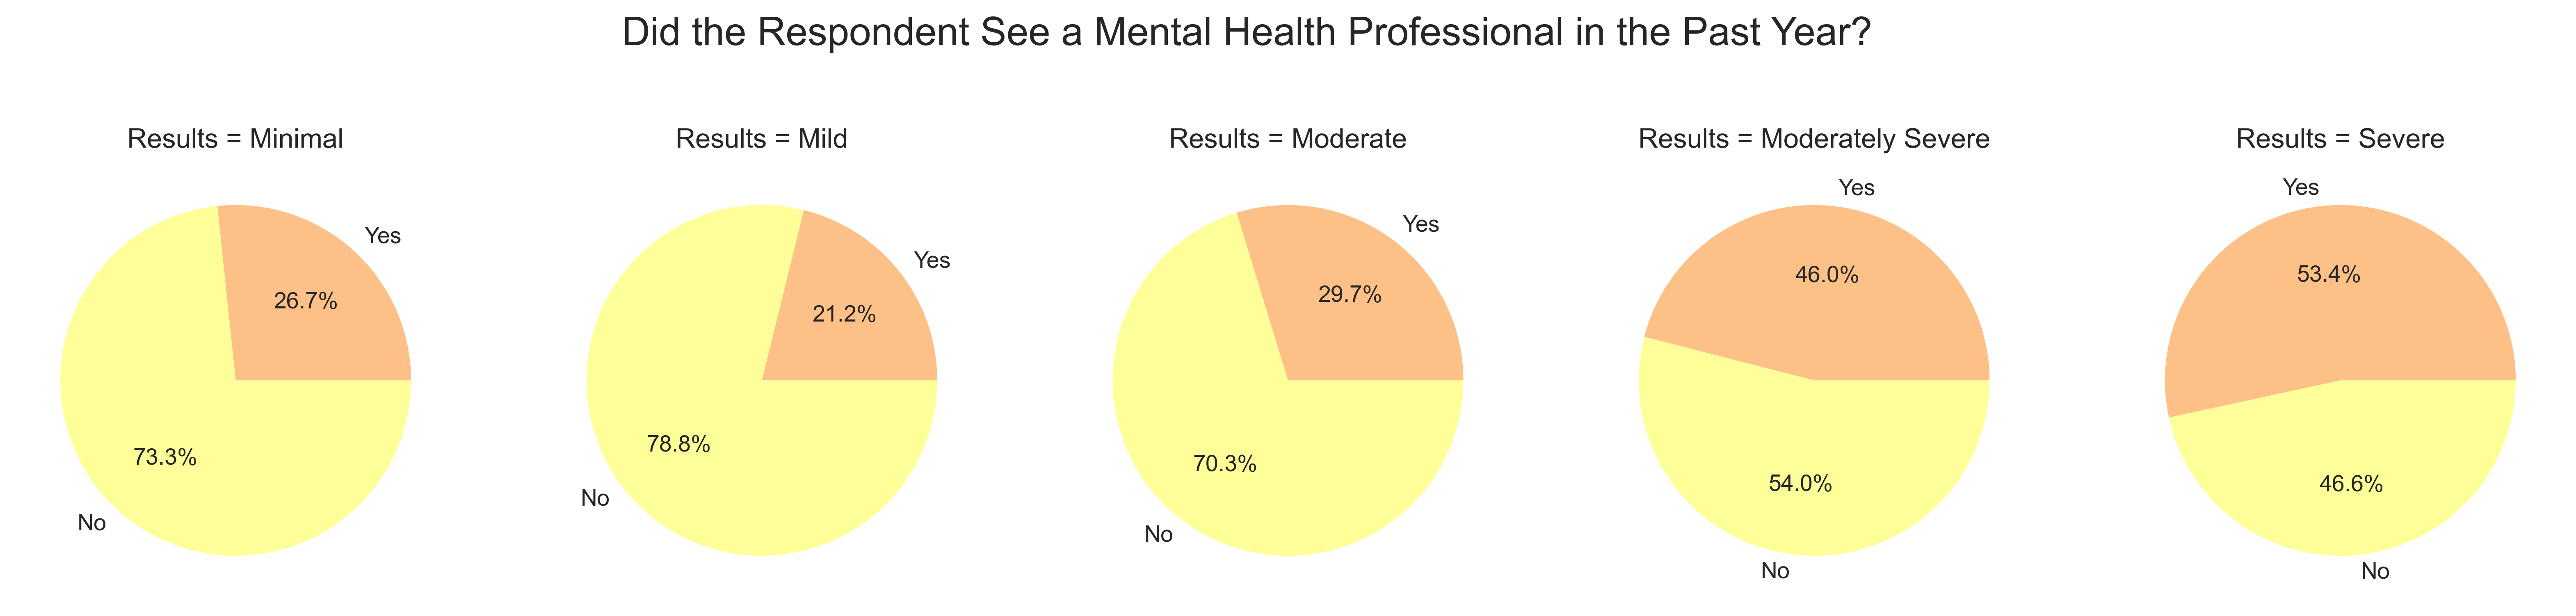

In [162]:
fig, axes = plt.subplots(1, 5, figsize = (20, 4), dpi = 400)
labels = ["Yes", "No"]
for ind, result in enumerate(['Minimal', 'Mild', 'Moderate', 'Moderately Severe', 'Severe']):
    phq9_d_by_result = phq9_d[(phq9_d["Assessment Results"] == result) & (phq9_d.iloc[:, 9] == 3) ]
    values = phq9_d_by_result["HUQ090"].value_counts().sort_index().values
    axes[ind].pie(values, labels = labels, autopct='%.1f%%', colors = Accent.colors[2:4])
    

    axes[ind].set_title(f"Results = {result}")
suptitle = fig.suptitle("Did the Respondent See a Mental Health Professional in the Past Year?", fontsize = "xx-large", y = 1.05)

plt.show()

However, the percentage of respondents who saw a mental health professional has increased over the years.

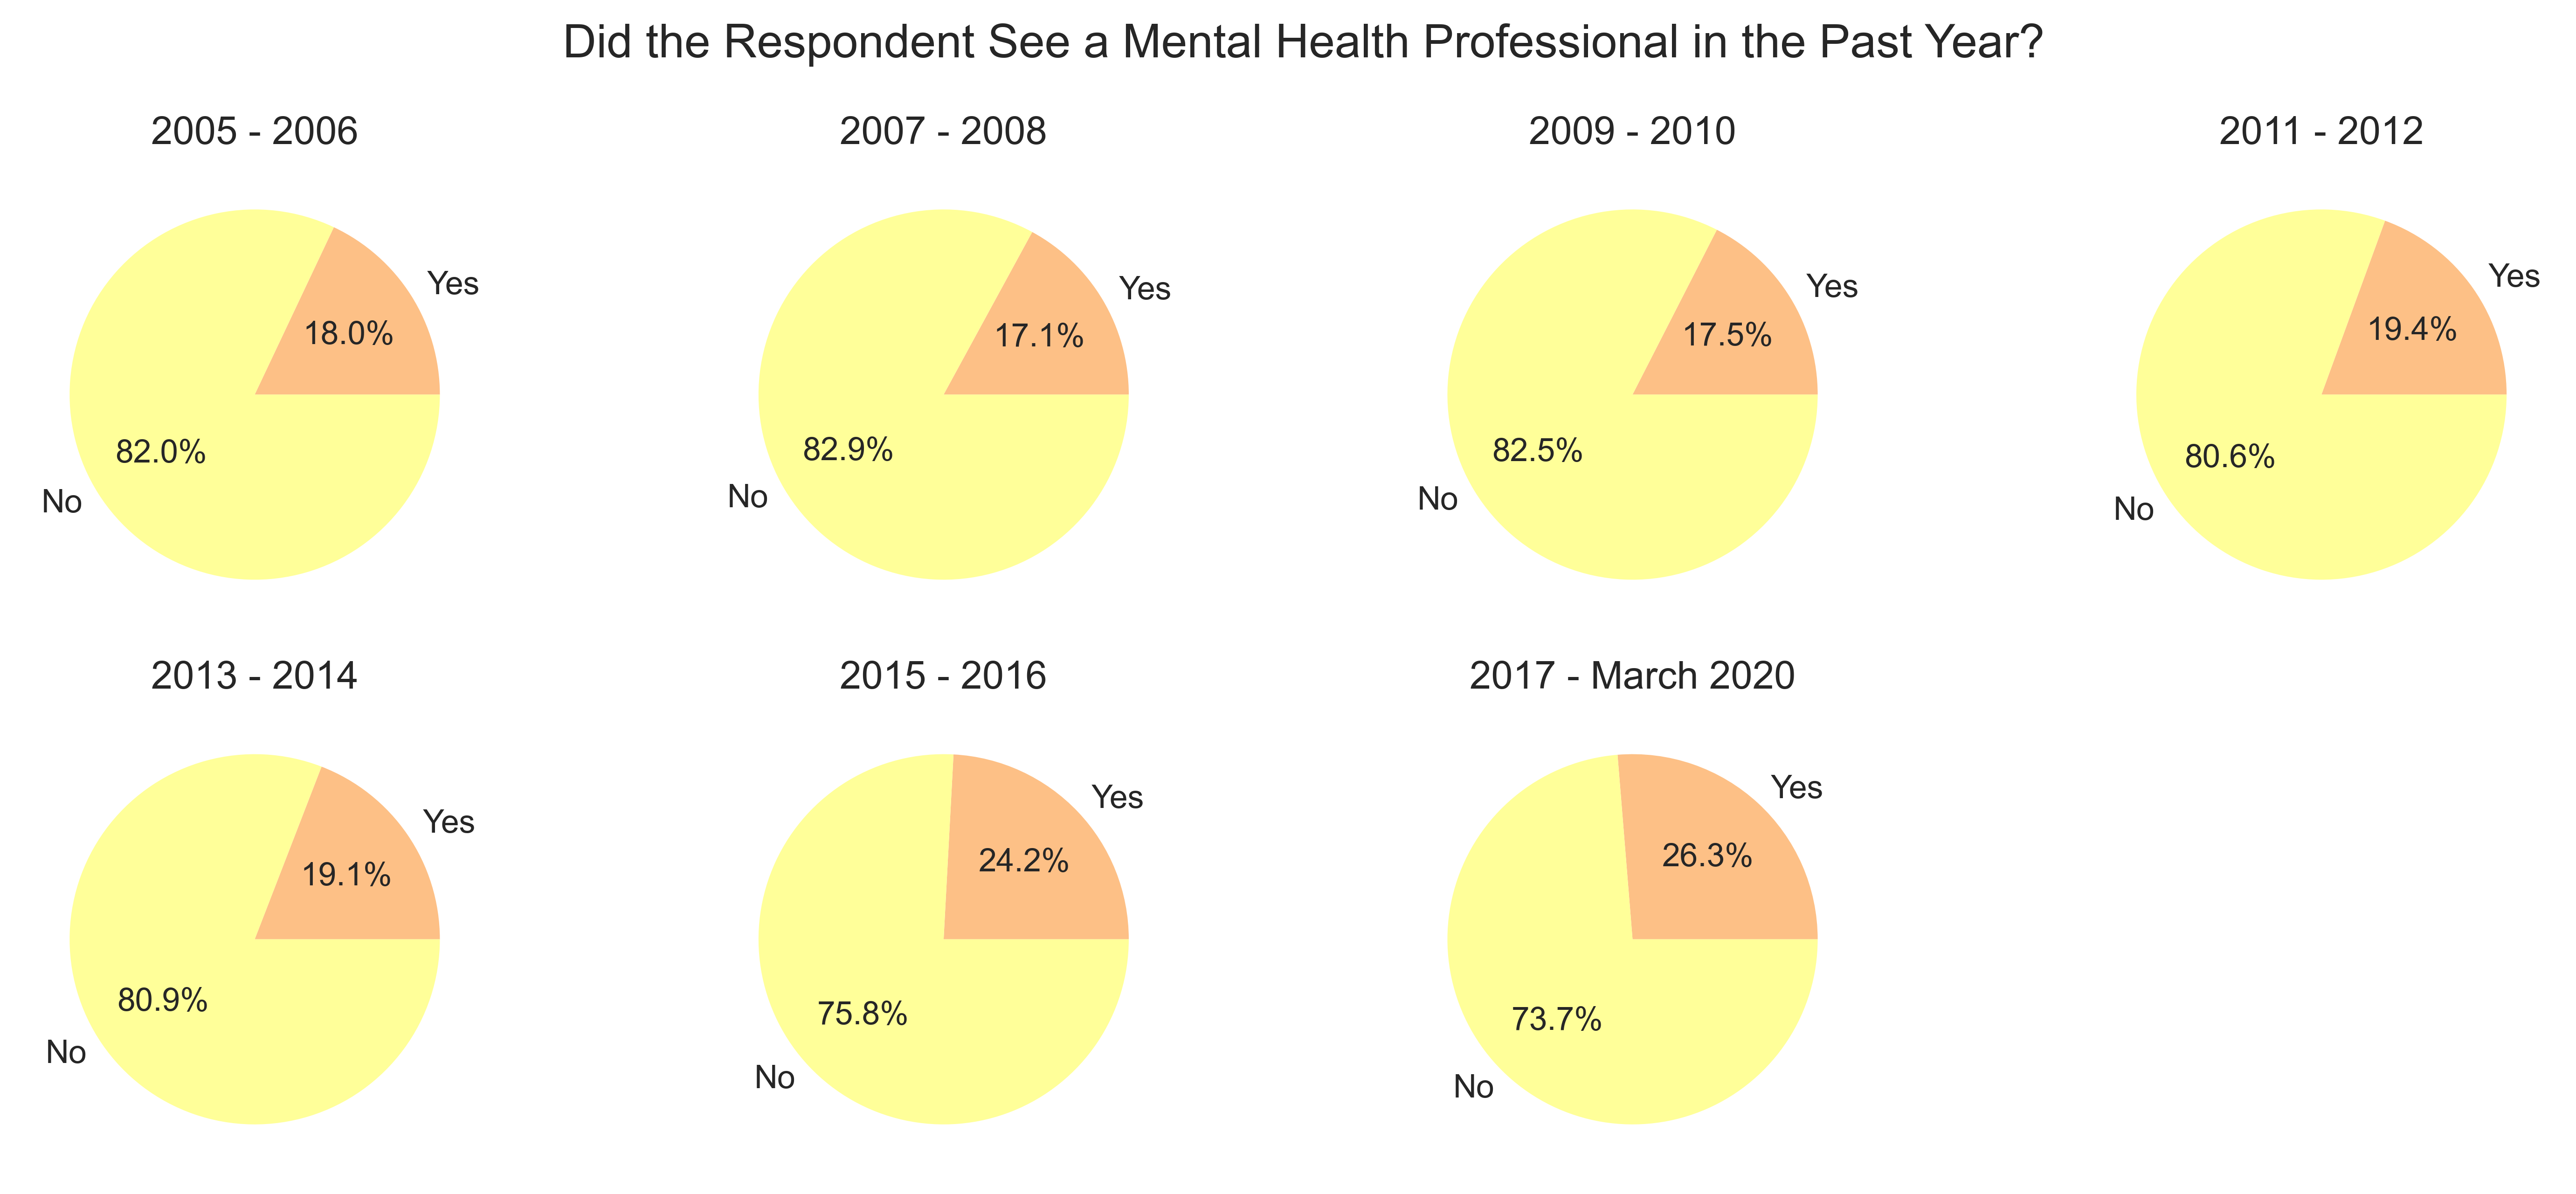

In [163]:
fig, axes = plt.subplots(2, 4, figsize = (12,5), dpi = 500)
axes = axes.ravel()
labels = ["Yes", "No"]
for ind, cycle in enumerate(cycle_names):
    phq9_d_by_cycle = phq9_d[ phq9_d.Cycle == cycle]

    values = phq9_d_by_cycle["HUQ090"].value_counts().sort_index().values 

    axes[ind].pie(values, labels = labels, autopct='%.1f%%', colors = Accent.colors[2:4])

    axes[ind].set_title(cycle)
fig.tight_layout()
fig.delaxes(axes[7])
suptitle = fig.suptitle("Did the Respondent See a Mental Health Professional in the Past Year?", y = 1.05, fontsize = "x-large")

plt.show()

**Summary**
* In most cases, it is not likely that a respondent is seeing a mental health professional
* The proportion of people who saw a mental health professional increased throughout the years

# Conclusion

We've shown that the PHQ-9 results have been remarkably consistent throughout the years. The distribution of `Assessment Scores` and `Assessment Results` are both right-skewed, implying that American adults are significantly more likely to have low PHQ-9 assessment scores. 

We demonstrated that, for each problem, less than 50% of respondents would answer 1 or greater. If a respondent *did* answer 1 or greater to a problem, it was likely to be "Trouble sleeping or sleeping too much" or "Feeling tired or having little energy"."Moving or speaking slowly or too fast" and "Thought you would be better off dead" were good indicators of "Moderate", "Moderately Severe" and "Severe" depression, as they were rare for "Minimal" and "Mild" depression. 

We found that, if a respondent experienced one of these problems in the past 2 weeks, it was likely for "Several days"; "More than half the days" and "Every day" was typically much more rare.

Lastly, we have shown that majority of the time, American adults do not go to mental health professionals. However, the percentage *has* increased over the years.  

I am very curious to compare the insights we've gathered here to the insights we will gather in the post-pandemic data. I will update this project after that happens.